<h1 style="text-align:center;">Credit Default Risk Prediction</h1>
<p align="center">
  <img src="loan-default-risk-prediction-machine-learning-project.jpg" width="700" height="300">
</p>

##  Business Overview:
Credit Risk is the possibility of a loss resulting from a borrower's failure to repay a
loan or meet a contractual obligation. The primary goal of a credit risk assessment is to
find out whether potential borrowers are creditworthy and have the means to repay their
debts so that credit risk or loss can be minimized and the loan is granted to only
creditworthy applicants.
If the borrower shows an acceptable level of default risk, then their loan application can
be approved upon agreed terms.
This project involves understanding financial terminologies attached to credit risk and
building a classification model for default prediction with LightGBM. Hyperparameter
Optimization is done using the Hyperopt library and SHAP is used for model
explainability.

__Aim__
To predict loan defaulters and minimize the risk of loss on the basis of credit history,
employment, and demographic data.

__Data Description__
The dataset contains information about 143727 borrowers’ on various attributes such as
employment type, work experience, income, dependents, total loans, total payment
done, etc.


1. [Data Overview](#data-overview)
2. [Importing Libraries](#importing-libraries)
3. [Data Cleaning & Preprocessing](#data-cleaning-and-preprocessing)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
    - [Univariate Analysis](#univariate-analysis)
    - [Bivariate Analysis](#bivariate-analysis)
    - [Multivariate Analysis](#multivariate-analysis)
5. [Data Encoding](#data-encoding)
6. [Data Scaling](#data-scaling)
7. [Data Modeling](#data-modeling)
8. [Model Evaluation](#model-evaluation)
9. [Pipeline](#pipeline)
10. [Deployment](#deployment)

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:#87CEEB; /* Blue Sky */
           color:white;
           font-family:cursive
           ">
<h2 style="text-align:center;">Data Overview</h2>
</div>

# Description of Columns
| Columns            | Description                                           |
|--------------------|-------------------------------------------------------|
| User_id            | User Identifier                                       |
| employment_type    | Employment Type (Salaried, Self-Employed)             |
| tier_of_employment | Tier of Employment (According to company performance) |
| industry           | Industry of Employer                                  |
| role               | Role of User in company                               |
| work_experience    | Total Work Experience                                 |
| total_income       | Total Income of customer                              |
| gender             | Gender of Customer                                    |
| married            | Single / Married / Divorced / Widowed etc.            |
| dependents         | No. of dependents on user                             |
| home_type          | Rented / Owned etc.                                   |
| pincode            | Middle 3 digit of Pincode                             |
| has_social_profile | Has FB/Twitter or any other social profile            |
| is_verified        | Is Social Profile Verified                            |
| delinq_2yrs        | Number of loan delinquencies in last 2 years          |
| total_payement     | Total Payment made towards loan in last 2 years       |
| received_principal | Total Principal paid towards loan in last 2 years     |
| interest_received  | Total Interest Received towards loan in last 2 years  |
| number_of_loans    | Number of Loans in last 2 years                       |
| emi_1_dpd          | DPD in repayment of 1st EMI (0, 30+, 60+, 90+)        |
| emi_2_dpd          | DPD in repayment of 2nd EMI (0, 30+, 60+, 90+)        |
| emi_3_dpd          | DPD in repayment of 3rd EMI (0, 30+, 60+, 90+)        |
| emi_4_dpd          | DPD in repayment of 4th EMI (0, 30+, 60+, 90+)        |
| emi_5_dpd          | DPD in repayment of 5th EMI (0, 30+, 60+, 90+)        |
| emi_6_dpd          | DPD in repayment of 6th EMI (0, 30+, 60+, 90+)        |
| max_dpd            | Maximum DPD (0, 30+, 60+, 90+) attained               |
| yearmo             | Year and month of loan application (YYYYMM format)    |

## Action Items
- Drop Gender Column (can't use gender as distinguishing factor for credit risk)
- According to yearmo, split data in Train, Validation, Hold Out
- DPD Roll Rate Analysis and Window Roll Rate Analysis for defining label (default = dpd X in first Y months, Define X & Y)

In [2]:
import pandas as pd
df = pd.read_csv('data\credit_risk_data.csv')
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\DELL\AppData\Local\Temp\ipykernel_6696\736679746.py:2: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('data\credit_risk_data.csv')


C:\Users\DELL\AppData\Local\Temp\ipykernel_6696\736679746.py:2: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data\credit_risk_data.csv')


User_id   employment_type tier_of_employment  \
0  7013527          Salaried                  B   
1  7014291  Self - Employeed                  D   
2  7014327               NaN                NaN   
3  7014304               NaN                NaN   
4  7031995               NaN                NaN   

                                            industry  \
0  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
1  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
2  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
3  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
4  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   

                               role work_experience  total_income  gender  \
0  KHMbckjadbckIFGAZSEWdkcndwkcnCCM             1-2      125000.0  Female   
1  KHMbckjadbckIFGNCSEWdkcndwkcnCCM             10+       61000.0  Female   
2  KHMbckjadbckIFGNYSEWdkcndwkcnCCM            5-10      100000.0   Other   
3  KHMbckjadbckIFGCASEWdkcndwkcnCCM             2-3       30000.0    Male   
4  KHMbckjadbckIFGCASEWdkcndwkcnCCM             10+       65000.0    Male   

  married  dependents  ... interest_received number_of_loans emi_1_dpd  \
0     Yes           4  ...            852.69               0         0   
1      No           1  ...           4912.53               0         0   
2     NaN           3  ...           3310.68               0        90   
3     NaN           1  ...           1459.76               0         0   
4     NaN           3  ...           1793.00               0         0   

  emi_2_dpd  emi_3_dpd  emi_4_dpd  emi_5_dpd  emi_6_dpd  max_dpd  yearmo  
0        90         90         90         90         90       90  202203  
1         0          0          0          0          0        0  202203  
2        90         90         90         90         90       90  202205  
3         0          0          0          0          0        0  202203  
4         0          0          0          0          0        0  202203  

[5 rows x 27 columns]

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143727 entries, 0 to 143726
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   User_id             143727 non-null  int64  
 1   employment_type     59085 non-null   object 
 2   tier_of_employment  59085 non-null   object 
 3   industry            143723 non-null  object 
 4   role                143727 non-null  object 
 5   work_experience     143723 non-null  object 
 6   total_income        143727 non-null  float64
 7   gender              143727 non-null  object 
 8   married             95584 non-null   object 
 9   dependents          143727 non-null  int64  
 10  home_type           143727 non-null  object 
 11  pincode             143727 non-null  object 
 12  has_social_profile  95871 non-null   object 
 13  is_verified         107924 non-null  object 
 14  delinq_2yrs         143727 non-null  int64  
 15  total_payement      143727 non-nul

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:#87CEEB; /* Blue Sky */
           color:white;
           font-family:cursive
           ">
<h2 style="text-align:center;">Adding libraries</h2>
</div>

In [4]:
# ! pip install hyperopt
# utils import
# ! pip install python3-utils
# ! pip install utils

In [5]:
import warnings
warnings.filterwarnings("ignore")
import os
path = os.getcwd()
import sys
sys.path.append("")
from utils import *

import pandas as pd
import numpy as np

import random

import category_encoders as ce
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
import bisect

from sklearn.preprocessing import OneHotEncoder

from hyperopt import fmin, tpe, hp, anneal, Trials

import os
import gc

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)
%load_ext autoreload
%autoreload 2

In [6]:
#Defining Parameters
data_path = 'data\credit_risk_data.csv'# Path of data
#Non feature Columns (not to be used as features in model)
id_cols = ['User_id','emi_1_dpd', 'emi_2_dpd', 'emi_3_dpd', 'emi_4_dpd', 'emi_5_dpd', 'emi_6_dpd', 'max_dpd', 'yearmo']
drop_columns = ['gender']

In [7]:
# Read Data and drop Non usable Columns
df = pd.read_csv(data_path)
df = df.drop(columns = drop_columns)
df.reset_index(drop = True, inplace = True)
print(df.drop(columns = id_cols).shape)
df.head(5)

(143727, 17)


User_id   employment_type tier_of_employment  \
0  7013527          Salaried                  B   
1  7014291  Self - Employeed                  D   
2  7014327               NaN                NaN   
3  7014304               NaN                NaN   
4  7031995               NaN                NaN   

                                            industry  \
0  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
1  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
2  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
3  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
4  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   

                               role work_experience  total_income married  \
0  KHMbckjadbckIFGAZSEWdkcndwkcnCCM             1-2    125000.000     Yes   
1  KHMbckjadbckIFGNCSEWdkcndwkcnCCM             10+     61000.000      No   
2  KHMbckjadbckIFGNYSEWdkcndwkcnCCM            5-10    100000.000     NaN   
3  KHMbckjadbckIFGCASEWdkcndwkcnCCM             2-3     30000.000     NaN   
4  KHMbckjadbckIFGCASEWdkcndwkcnCCM             10+     65000.000     NaN   

   dependents home_type  ... interest_received number_of_loans emi_1_dpd  \
0           4      rent  ...           852.690               0         0   
1           1  mortgage  ...          4912.530               0         0   
2           3       own  ...          3310.680               0        90   
3           1      rent  ...          1459.760               0         0   
4           3      rent  ...          1793.000               0         0   

   emi_2_dpd  emi_3_dpd  emi_4_dpd  emi_5_dpd  emi_6_dpd  max_dpd  yearmo  
0         90         90         90         90         90       90  202203  
1          0          0          0          0          0        0  202203  
2         90         90         90         90         90       90  202205  
3          0          0          0          0          0        0  202203  
4          0          0          0          0          0        0  202203  

[5 rows x 26 columns]

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:#87CEEB; /* Blue Sky */
           color:white;
           font-family:cursive
           ">
<h2 style="text-align:center;">Data Cleaning & Preprocessing</h2>
</div>

In [8]:
df.describe()

User_id  total_income  dependents  delinq_2yrs  total_payement  \
count   143727.000    143727.000  143727.000   143727.000      143727.000   
mean  37334736.152     72422.562       1.997        0.277       10840.882   
std   31828110.028     55393.277       1.411        0.789        8613.422   
min     208036.000      4000.000       0.000        0.000           0.000   
25%    3276118.000     45000.000       1.000        0.000        4674.775   
50%   57665174.000     61800.000       2.000        0.000        8212.410   
75%   67291743.500     86000.000       3.000        0.000       14175.770   
max   78958941.000   7141778.000       4.000       22.000       57777.580   

       received_principal  interest_received  number_of_loans  emi_1_dpd  \
count          143727.000         143727.000       143727.000 143727.000   
mean             8407.002           2352.730            0.006      7.955   
std              7224.396           2447.760            0.099     24.160   
min                 0.000              0.000            0.000      0.000   
25%              3104.160            841.685            0.000      0.000   
50%              6000.000           1632.240            0.000      0.000   
75%             11664.365           2904.770            0.000      0.000   
max             35000.010          24205.620            5.000     90.000   

       emi_2_dpd  emi_3_dpd  emi_4_dpd  emi_5_dpd  emi_6_dpd    max_dpd  \
count 143727.000 143727.000 143727.000 143727.000 143727.000 143727.000   
mean       8.582      8.611      8.323      8.325      8.320     13.301   
std       25.006     25.156     25.092     25.103     25.094     26.905   
min        0.000      0.000      0.000      0.000      0.000      0.000   
25%        0.000      0.000      0.000      0.000      0.000      0.000   
50%        0.000      0.000      0.000      0.000      0.000      0.000   
75%        0.000      0.000      0.000      0.000      0.000     30.000   
max       90.000     90.000     90.000     90.000     90.000     90.000   

          yearmo  
count 143727.000  
mean  202203.000  
std        1.414  
min   202201.000  
25%   202202.000  
50%   202203.000  
75%   202204.000  
max   202205.000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143727 entries, 0 to 143726
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   User_id             143727 non-null  int64  
 1   employment_type     59085 non-null   object 
 2   tier_of_employment  59085 non-null   object 
 3   industry            143723 non-null  object 
 4   role                143727 non-null  object 
 5   work_experience     143723 non-null  object 
 6   total_income        143727 non-null  float64
 7   married             95584 non-null   object 
 8   dependents          143727 non-null  int64  
 9   home_type           143727 non-null  object 
 10  pincode             143727 non-null  object 
 11  has_social_profile  95871 non-null   object 
 12  is_verified         107924 non-null  object 
 13  delinq_2yrs         143727 non-null  int64  
 14  total_payement      143727 non-null  float64
 15  received_principal  143727 non-nul

In [10]:
df.describe(include = 'object')

employment_type tier_of_employment  industry  \
count            59085              59085    143723   
unique               2                  7     12975   
top           Salaried                  B         0   
freq             47890              18388     78189   

                                    role  work_experience married home_type  \
count                             143727           143723   95584    143727   
unique                                46                8       2         5   
top     KHMbckjadbckIFGCASEWdkcndwkcnCCM                0     Yes  mortgage   
freq                               22476            78189   47833     69900   

       pincode has_social_profile   is_verified  
count   143727              95871        107924  
unique     844                  2             3  
top     XX945X                 No  Not Verified  
freq      1677              48153         36046

In [11]:
## Checking for missing values 
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent =  df.isnull().sum() / len(df) * 100
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("The dataset has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns
missing_values_table(df)

The dataset has 26 columns.
There are 7 columns that have missing values.


Missing Values  % of Total Values
employment_type              84642             58.900
tier_of_employment           84642             58.900
married                      48143             33.500
has_social_profile           47856             33.300
is_verified                  35803             24.900
industry                         4              0.000
work_experience                  4              0.000

In [12]:
df.duplicated().sum()   # There are 680 duplicate rows in the data

680

In [13]:
# Since Data is on timeline
df.yearmo.value_counts()

yearmo
202203    28750
202201    28750
202202    28750
202204    28750
202205    28727
Name: count, dtype: int64

Split data on timeline to make sure model developed is able to predict well on Out of time data
<br>**Train** - Yearmo 202201 to 202203
<br>**Validation** - Yearmo 202204
<br>**Hold Out** - Yearmo 202205 (Out of time data)

In [14]:
# Splitting Data into Train and validation, Holdout
def data_split(df):
    """Split data in train, val, hold_out
    Parameters
    ----------
    df : DataFrame
    
    Returns
    -------
    train :  DataFrame,
    val :  DataFrame,
    hold_out :  DataFrame
    """
    train = df[df.yearmo<=202203]
    val = df[df.yearmo==202204]
    hold_out = df[df.yearmo==202205]
    
    return train.reset_index(drop = True), val.reset_index(drop = True), hold_out.reset_index(drop = True)

In [15]:
train, val, hold_out = data_split(df)

In [16]:
print(train.shape, val.shape, hold_out.shape)

(86250, 26) (28750, 26) (28727, 26)


In [17]:
# % of customer achieved X dpd (Since everyone starts at 0 dpd so 100% will be at 0 dpd)
def dpd_roll_rate(df):
    """DPD Roll Rate Analysis, 
    number and % of customer passed the particular dpd
    Parameters
    ----------
    df : DataFrame
    
    Returns
    -------
    dpd_flow : DataFrame
    """
    
    dpd_flow = pd.DataFrame(columns = ["dpd","user_count"])
    for dpd in [0,30,60,90]:
        user_count = len(df[df.max_dpd>=dpd])
        dpd_flow.loc[len(dpd_flow.index)] = [dpd, user_count]
    dpd_flow['user_count']  = dpd_flow['user_count'].astype(int)
    dpd_flow['user_percent'] = (dpd_flow['user_count']*100/max(dpd_flow['user_count'])).round(2).astype(str)+' %'
    return dpd_flow
dpd_roll_rate(train)

dpd  user_count user_percent
0    0       86250      100.0 %
1   30       22073      25.59 %
2   60        8099       9.39 %
3   90        7926       9.19 %

As we can see
<br>- ~25.6% customer paid back after crossing dpd30
<br>- Most of the people who crossed dpd60 are also crossing dpd 90
<br>**Conclusion** - *DPD60 should be right choice as Recovery rate is low post that*

## window Roll Rate

In [18]:
# For DPD 60 analyzing % of customer attain dpd60 on various lifecycle of EMI
def window_roll_rate(df, dpd):
    """Window Roll Rate Analysis, 
    First EMI of reaching dpd >= X, count and % by First EMI
    Parameters
    ----------
    df : DataFrame
    dpd : Int (30, 60, 90)
    
    Returns
    -------
    window_roll : DataFrame
    """
    df2 = df[df.max_dpd>=dpd]
    df2['first_deafult'] = np.where(df2.emi_1_dpd>=dpd, 1, 
                                   np.where(df2.emi_2_dpd>=dpd, 2, 
                                           np.where(df2.emi_3_dpd>=dpd, 3, 
                                                   np.where(df2.emi_4_dpd>=dpd, 4, 
                                                           np.where(df2.emi_5_dpd>=dpd, 5, 
                                                                   np.where(df2.emi_6_dpd>=dpd, 6, 0))))))
    
    window_roll = df2.groupby('first_deafult')['User_id'].count().reset_index()
    window_roll['user_percent'] = (window_roll['User_id']*100/sum(window_roll['User_id'])).round(2).astype(str)+' %'
    window_roll.columns = ['first_default_emi','users_count', '% of Users']
    return window_roll
window_roll_rate(train, 60)

first_default_emi  users_count % of Users
0                  1         6546    80.82 %
1                  2         1084    13.38 %
2                  3          421      5.2 %
3                  4           22     0.27 %
4                  5           18     0.22 %
5                  6            8      0.1 %

As we can see
<br>- 80.8% of Defaulters dafault in 1st EMI and 5.2% default in 3rd EMI, Post 3rd EMI rate is low, so we can conclude people Most of the Defaulter default in 1st 3 EMIs
<br>**Conclusion** - We can use DPD60 in first 3 months as our label

## Label Creation

In [19]:
def create_label(df, dpd, months):
    """Genrate label according to dpd in months,
    returns dataframe with label columns
    Parameters
    ----------
    df : DataFrame
    dpd : Int (30, 60, 90)
    months : Int (1,2,3,4,5,6)
    
    Returns
    -------
    df : DataFrame
    """
    months = ["emi_"+str(x)+"_dpd" for x in range(1, months+1)]
    df['label'] = np.where(df[months].max(axis = 1)>=dpd, 1, 0)
    print("label columns added to dataframe")
    return df

In [20]:
## Label Creation
train = create_label(train, dpd = 60, months = 3)
val = create_label(val, dpd = 60, months = 3)
hold_out = create_label(hold_out, dpd = 60, months = 3)

label columns added to dataframe
label columns added to dataframe
label columns added to dataframe


### Label Distribution

In [21]:
def label_distribution(data_list, data_list_name, label_name):
    """Print label distribution of list of dataframes
    ----------
    data_list : List of DataFrames
    data_list_name : List of Data Type (like Training, Validation)
    label_name : String (Column Name of Label)
    
    Returns
    -------
    """
    i = 0
    for d in data_list:
        label_distribution = pd.DataFrame(d[label_name].value_counts()).reset_index()
        label_distribution.columns = [label_name, 'user_count']
        label_distribution['% users'] = label_distribution['user_count']*100/sum(label_distribution['user_count'])
        print("")
        print(f"label distribution of {data_list_name[i]}")
        print(label_distribution)
        i = i+1
label_distribution([train, val, hold_out], ['Training', 'Validation', 'Hold Out'], 'label')


label distribution of Training
   label  user_count  % users
0      0       78199   90.666
1      1        8051    9.334

label distribution of Validation
   label  user_count  % users
0      0       25941   90.230
1      1        2809    9.770

label distribution of Hold Out
   label  user_count  % users
0      0       26118   90.918
1      1        2609    9.082


- Labels are imbalanced towards class 0
- Same level of Imbalance occure across Train, Validation, Hold Out

# Create Features

In [22]:
def derived_features(df):
    """Create Some Features
    ----------
    df : DataFrame
    
    Returns
    -------
    df : DataFrame
    """
    df['interest_received_ratio'] = (df['interest_received']/df['total_payement']).replace([np.inf, -np.inf], 0).fillna(0)
    df['total_payement_per_loan'] = (df['total_payement']/df['number_of_loans']).replace([np.inf, -np.inf], 0).fillna(0)
    df['delinq_2yrs_ratio'] = (df['delinq_2yrs']/df['number_of_loans']).replace([np.inf, -np.inf], 0).fillna(0)
    return df
## - % Amount Paid as interest in past Loan Repayment
## - % of Loans defaulted in last 2 years
train = derived_features(train)
val = derived_features(val)
hold_out = derived_features(hold_out)

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:#87CEEB; /* Blue Sky */
           color:white;
           font-family:cursive
           ">
<h2 style="text-align:center;">EDA</h2>
</div>

## Univariate

In [23]:
train.head()

User_id   employment_type tier_of_employment  \
0  7013527          Salaried                  B   
1  7014291  Self - Employeed                  D   
2  7014304               NaN                NaN   
3  7031995               NaN                NaN   
4  7033985               NaN                NaN   

                                            industry  \
0  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
1  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
2  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
3  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
4  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   

                               role work_experience  total_income married  \
0  KHMbckjadbckIFGAZSEWdkcndwkcnCCM             1-2    125000.000     Yes   
1  KHMbckjadbckIFGNCSEWdkcndwkcnCCM             10+     61000.000      No   
2  KHMbckjadbckIFGCASEWdkcndwkcnCCM             2-3     30000.000     NaN   
3  KHMbckjadbckIFGCASEWdkcndwkcnCCM             10+     65000.000     NaN   
4  KHMbckjadbckIFGCASEWdkcndwkcnCCM            5-10     90000.000     NaN   

   dependents home_type  ... emi_3_dpd emi_4_dpd emi_5_dpd  emi_6_dpd  \
0           4      rent  ...        90        90        90         90   
1           1  mortgage  ...         0         0         0          0   
2           1      rent  ...         0         0         0          0   
3           3      rent  ...         0         0         0          0   
4           4  mortgage  ...         0         0         0          0   

   max_dpd  yearmo  label  interest_received_ratio  total_payement_per_loan  \
0       90  202203      1                    0.467                    0.000   
1        0  202203      0                    0.214                    0.000   
2        0  202203      0                    0.219                    0.000   
3        0  202203      0                    0.152                    0.000   
4        0  202201      0                    0.131                    0.000   

   delinq_2yrs_ratio  
0              0.000  
1              0.000  
2              0.000  
3              0.000  
4              0.000  

[5 rows x 30 columns]

In [24]:
train.describe() 

User_id  total_income  dependents  delinq_2yrs  total_payement  \
count    86250.000     86250.000   86250.000    86250.000       86250.000   
mean  37381950.497     72337.323       2.001        0.280       10806.131   
std   31841337.261     58969.955       1.410        0.798        8603.037   
min     208036.000      4800.000       0.000        0.000           0.000   
25%    3273294.750     45000.000       1.000        0.000        4655.845   
50%   57684119.000     61174.270       2.000        0.000        8173.695   
75%   67331130.000     86000.000       3.000        0.000       14136.720   
max   78471596.000   7141778.000       4.000       22.000       57777.580   

       received_principal  interest_received  number_of_loans  emi_1_dpd  \
count           86250.000          86250.000        86250.000  86250.000   
mean             8371.521           2354.687            0.006      7.956   
std              7202.593           2458.578            0.098     24.162   
min                 0.000              0.000            0.000      0.000   
25%              3091.600            841.812            0.000      0.000   
50%              6000.000           1630.580            0.000      0.000   
75%             11550.000           2902.170            0.000      0.000   
max             35000.010          23450.380            5.000     90.000   

       emi_2_dpd  emi_3_dpd  emi_4_dpd  emi_5_dpd  emi_6_dpd   max_dpd  \
count  86250.000  86250.000  86250.000  86250.000  86250.000 86250.000   
mean       8.550      8.575      8.294      8.277      8.302    13.251   
std       24.966     25.117     25.050     25.058     25.057    26.866   
min        0.000      0.000      0.000      0.000      0.000     0.000   
25%        0.000      0.000      0.000      0.000      0.000     0.000   
50%        0.000      0.000      0.000      0.000      0.000     0.000   
75%        0.000      0.000      0.000      0.000      0.000    30.000   
max       90.000     90.000     90.000     90.000     90.000    90.000   

          yearmo     label  interest_received_ratio  total_payement_per_loan  \
count  86250.000 86250.000                86250.000                86250.000   
mean  202202.000     0.093                    0.238                   39.107   
std        0.817     0.291                    0.146                  834.130   
min   202201.000     0.000                    0.000                    0.000   
25%   202201.000     0.000                    0.135                    0.000   
50%   202202.000     0.000                    0.200                    0.000   
75%   202203.000     0.000                    0.310                    0.000   
max   202203.000     1.000                    0.845                41875.060   

       delinq_2yrs_ratio  
count          86250.000  
mean               0.001  
std                0.043  
min                0.000  
25%                0.000  
50%                0.000  
75%                0.000  
max                5.000

In [25]:
train.describe(include = 'object')

employment_type tier_of_employment  industry  \
count            35390              35390     86247   
unique               2                  7      8985   
top           Salaried                  B         0   
freq             28740              11110     46940   

                                    role  work_experience married home_type  \
count                              86250            86247   57339     86250   
unique                                46                8       2         5   
top     KHMbckjadbckIFGCASEWdkcndwkcnCCM                0      No  mortgage   
freq                               13317            46940   28835     42088   

       pincode has_social_profile is_verified  
count    86250              57460       64967  
unique     838                  2           3  
top     XX945X                 No    Verified  
freq       993              28838       21729

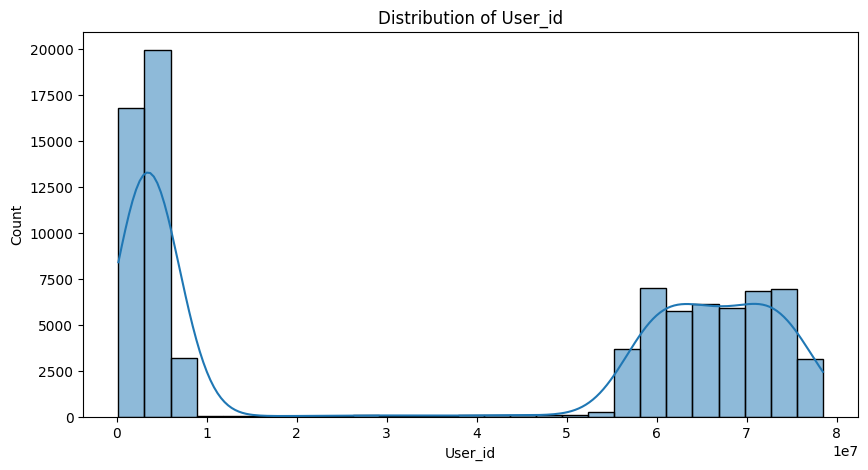

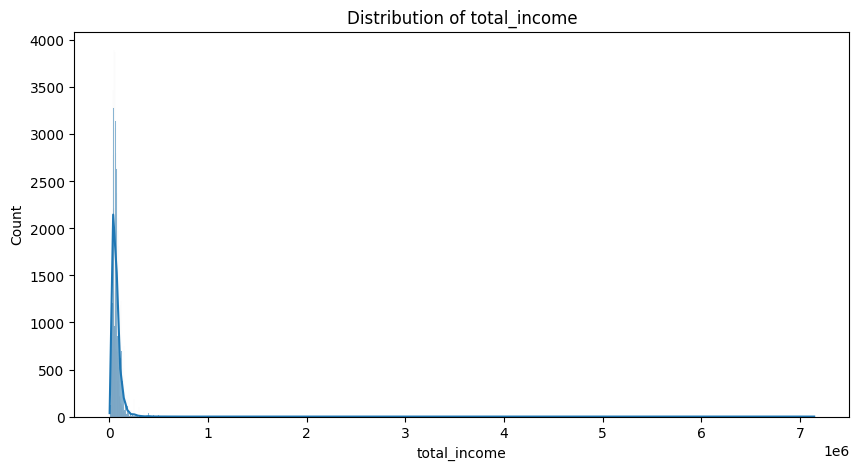

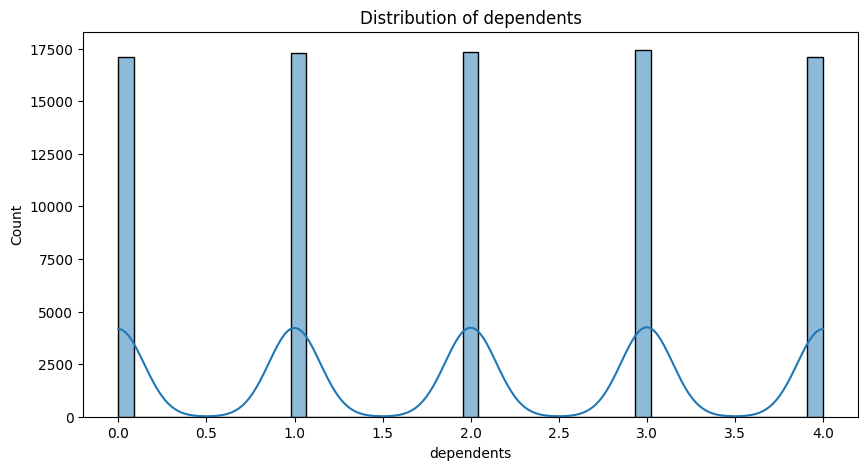

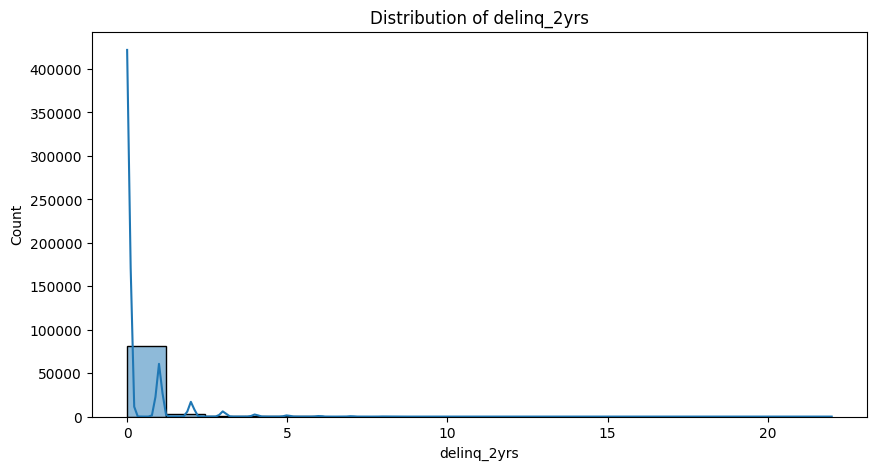

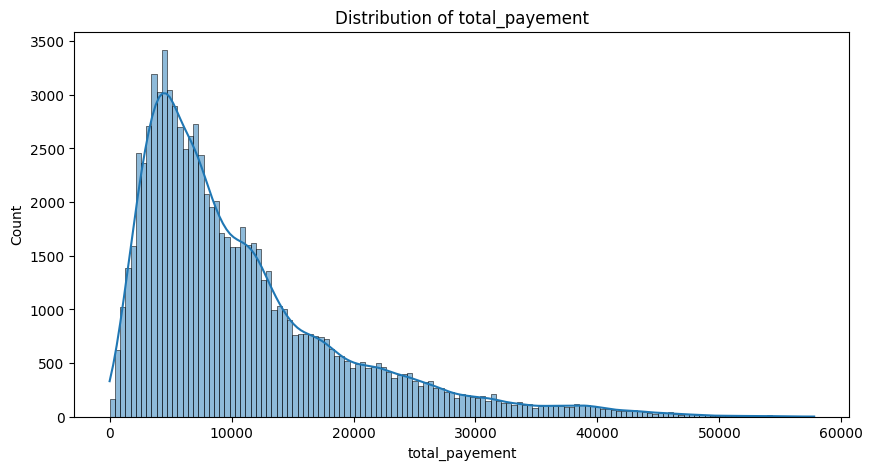

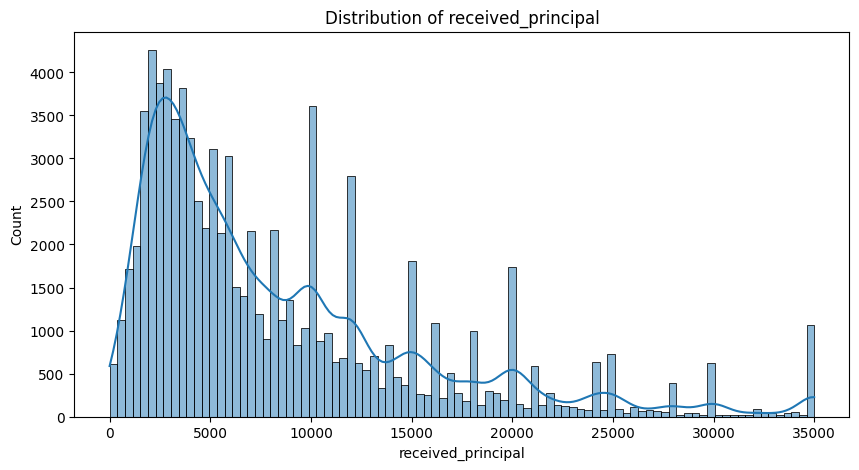

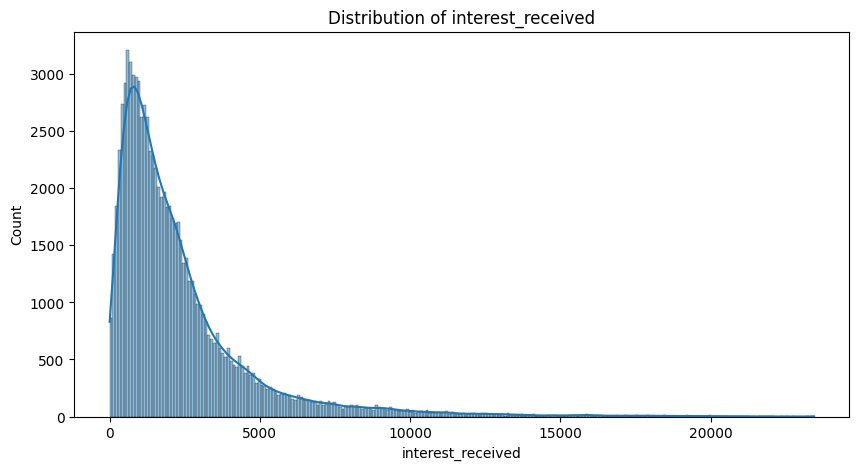

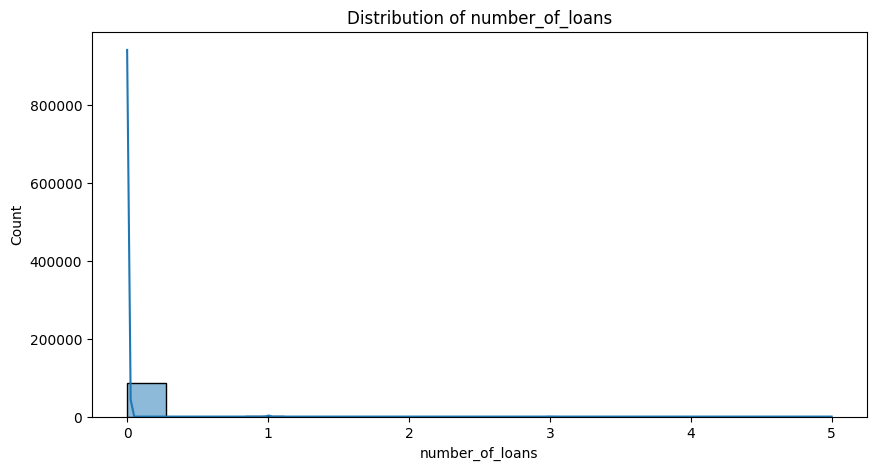

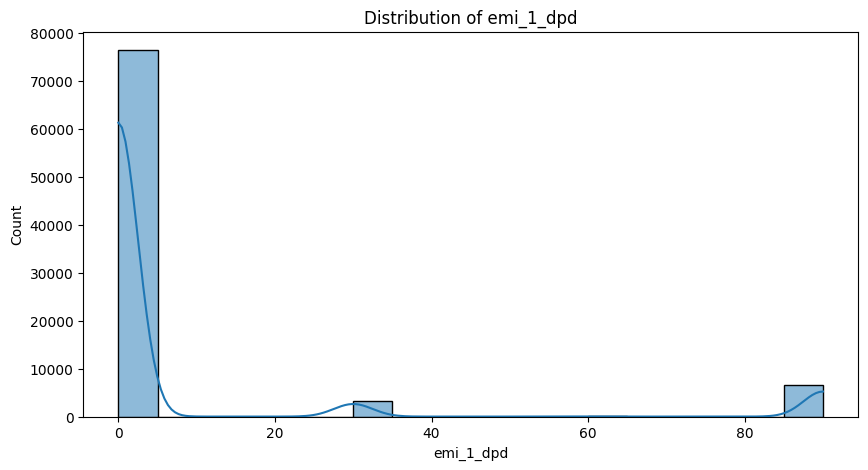

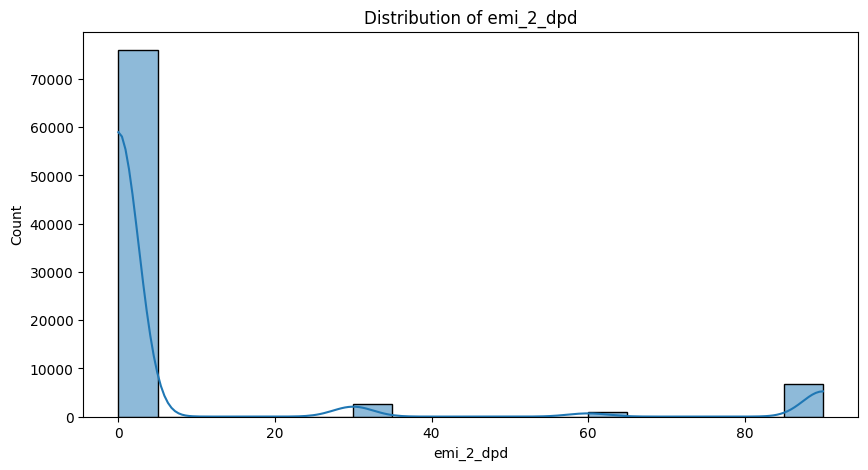

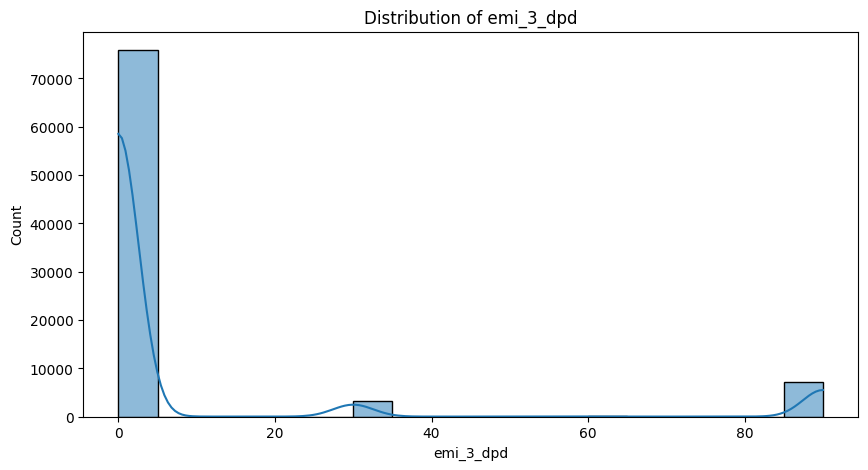

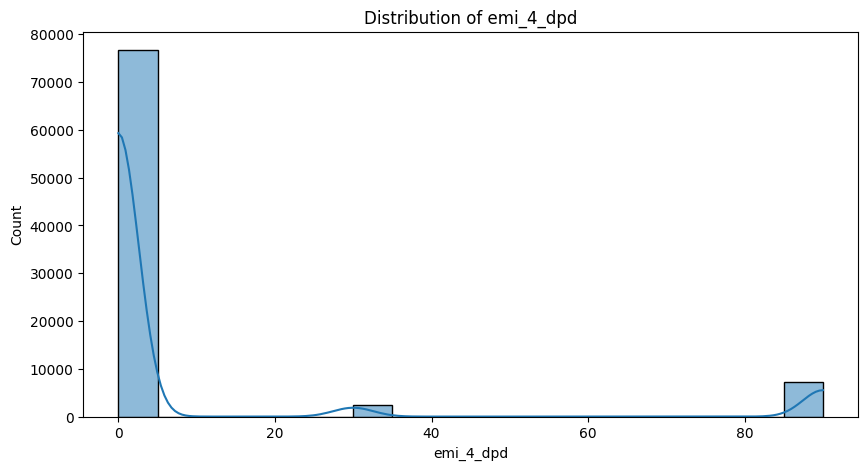

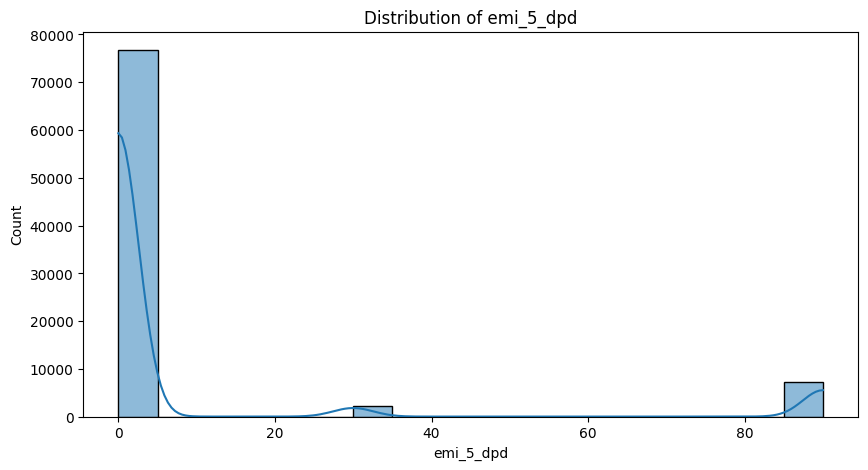

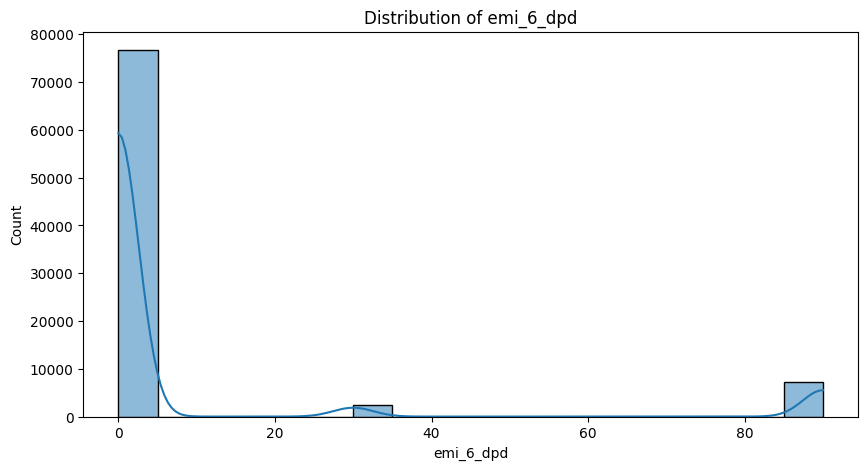

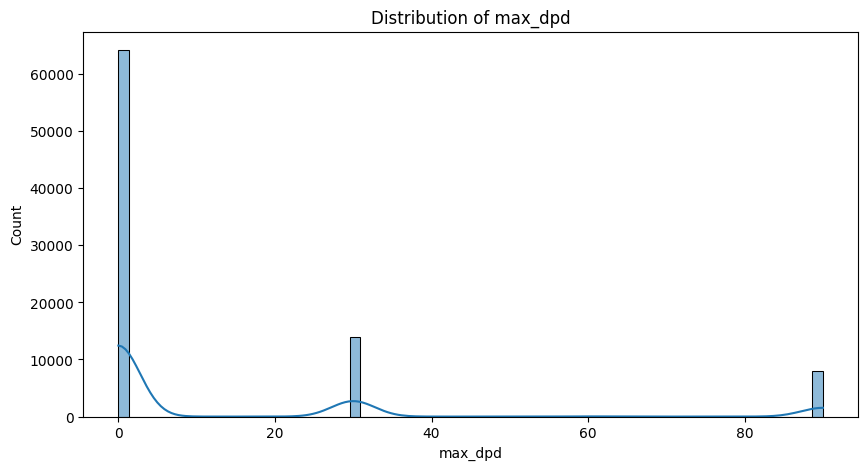

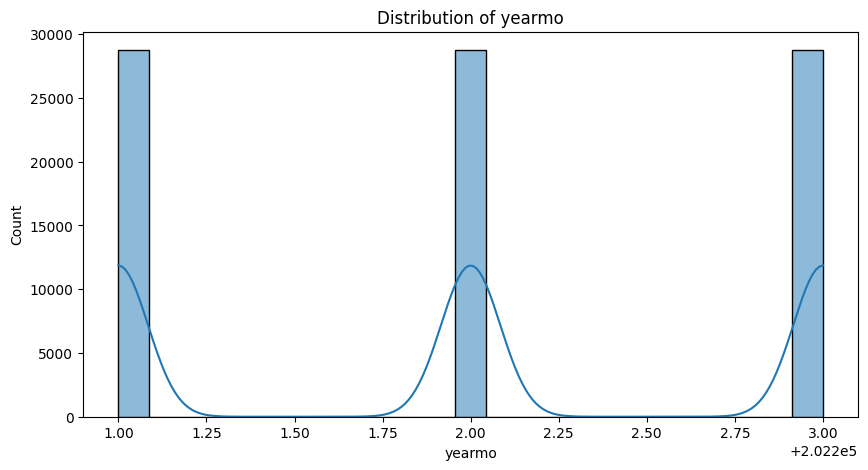

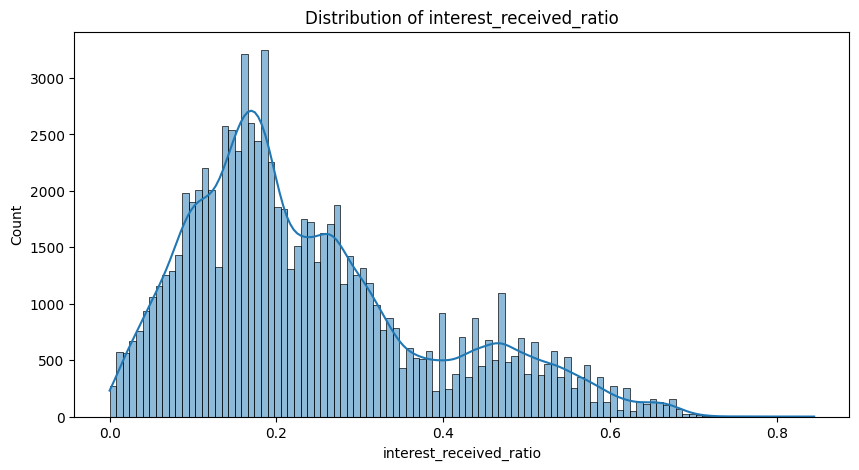

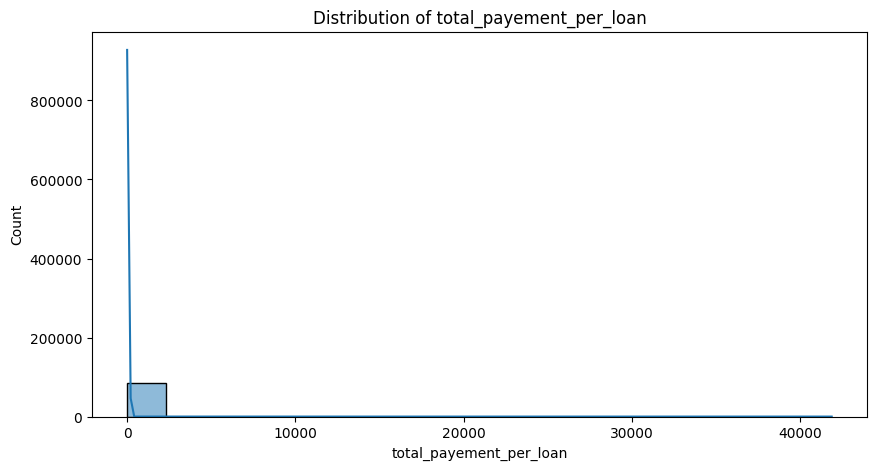

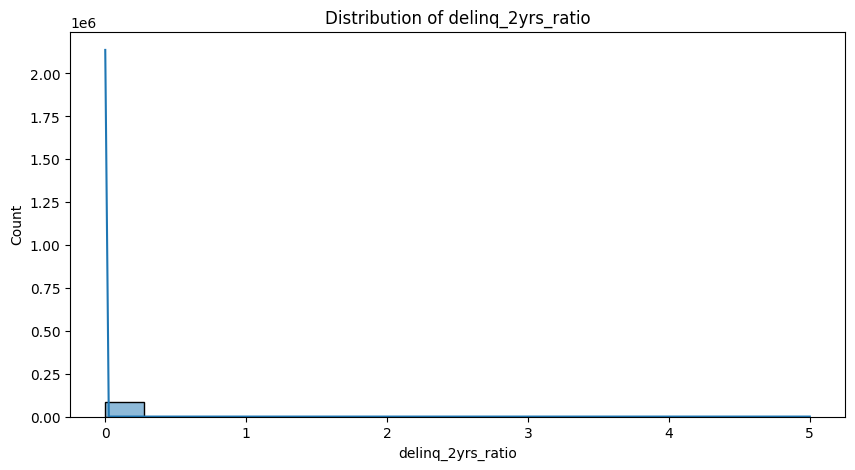

In [26]:
## plot the distribution of features
def plot_distribution(df, feature):
    """Plot distribution of feature
    ----------
    df : DataFrame
    feature : String
    
    Returns
    -------
    """
    plt.figure(figsize=(10, 5))
    plt.title(f"Distribution of {feature}")
    sns.histplot(df[feature], kde = True)
    plt.show()

for col in train.columns:
    if train[col].dtype in ['int64', 'float64']:
        plot_distribution(train, col)

## Bivariate
### Correlation

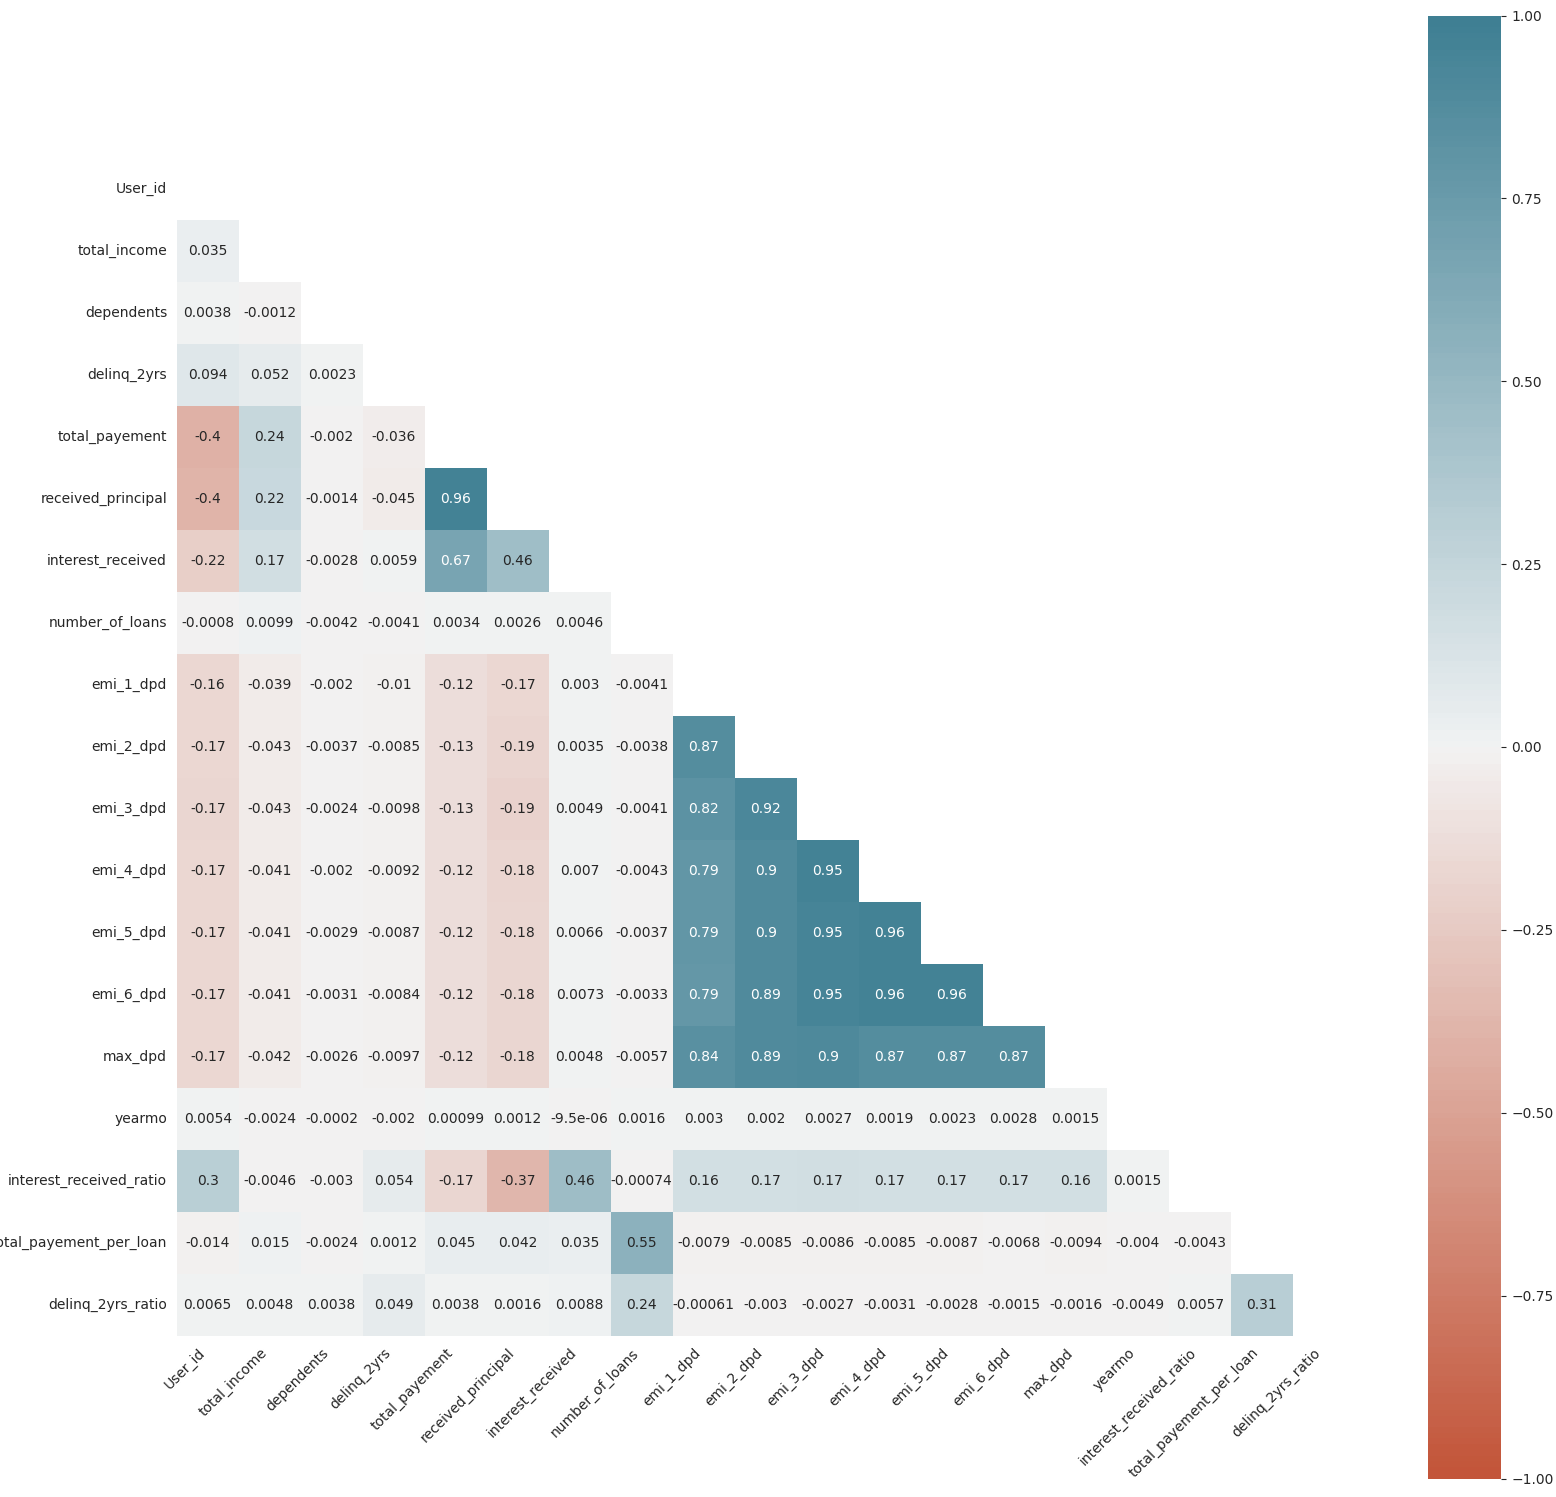

In [27]:
### Correlation Matrix of numerical features

def correlation_matrix(df):
    """Plot correlation matrix of numerical features
    ----------
    df : DataFrame
    
    Returns
    -------
    """
    numerical_features = df.select_dtypes(include = ['int64', 'float64']).columns
    corr = df[numerical_features].corr()

    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(len(corr.columns), len(corr.columns)))
    with sns.axes_style("white"):
        ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),
                             square=True, annot=True)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_autoscalex_on(True)
    ax.set_autoscaley_on(True)

    plt.show()
correlation_matrix(train)


Some Observations
<br> - Total payment and Received Principal are highly correlated (0.96)
<br> - Interest Received and Total payment are mildely correlated (0.67)

### Box Plot vs Label

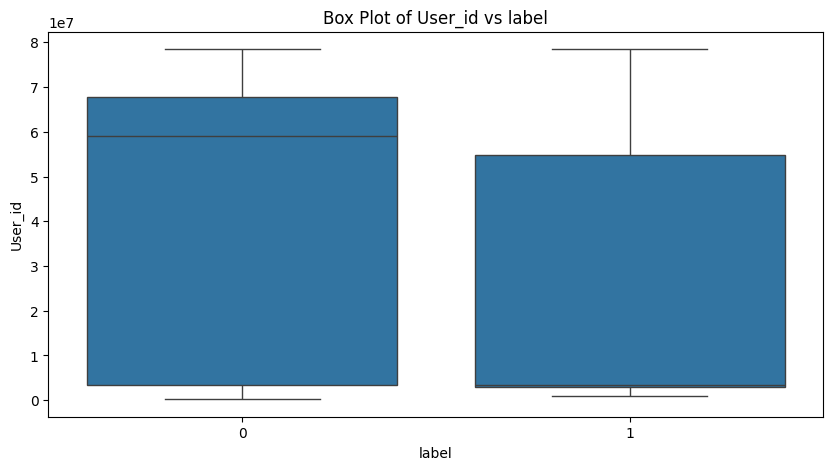

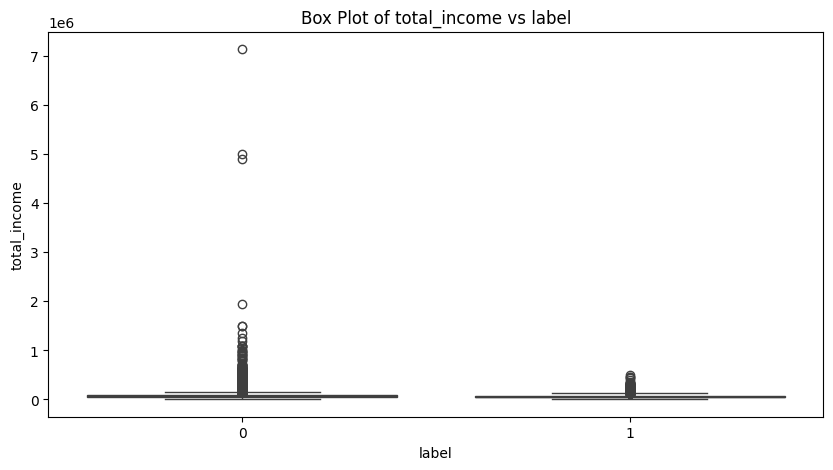

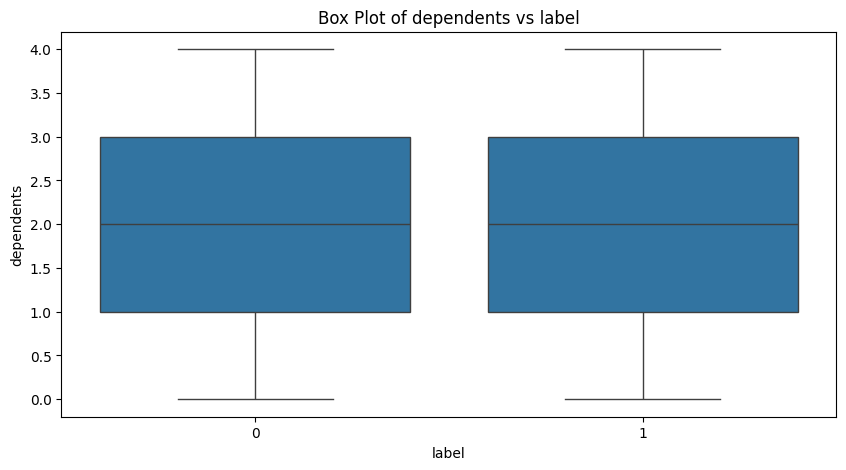

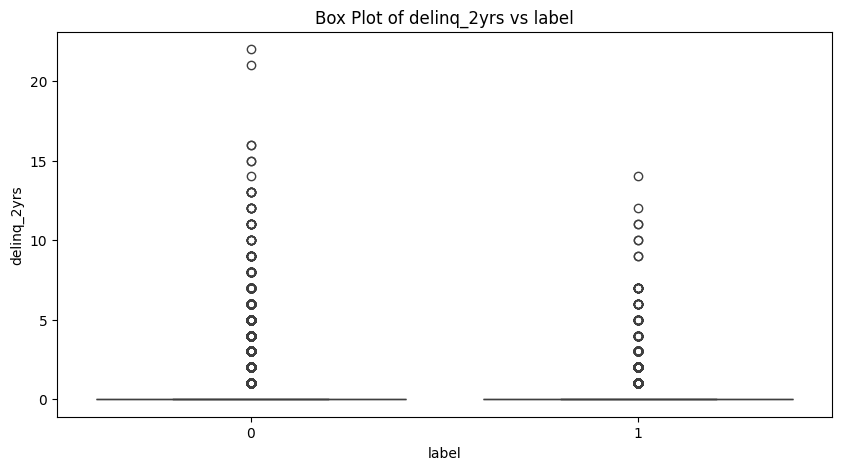

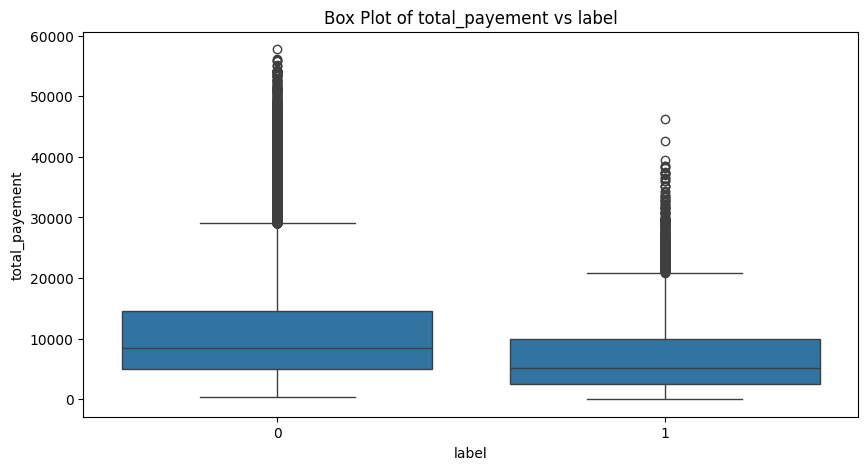

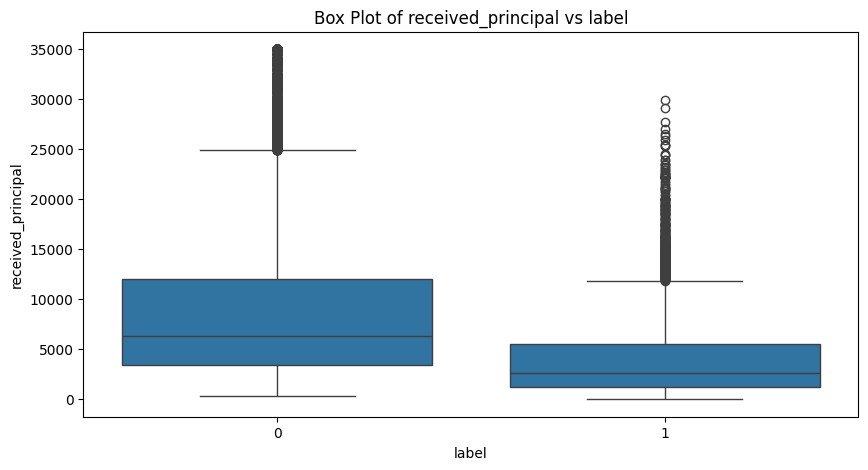

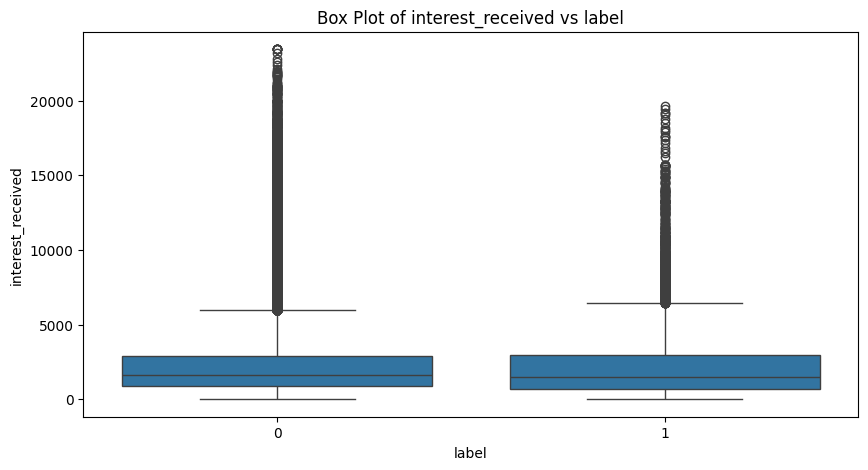

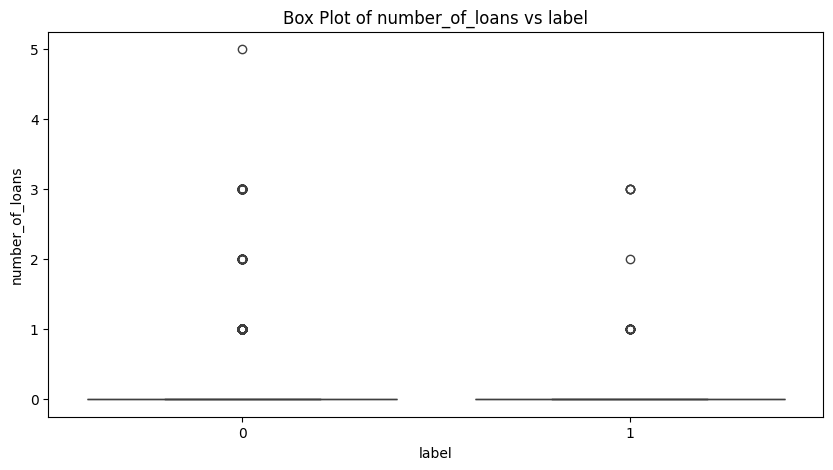

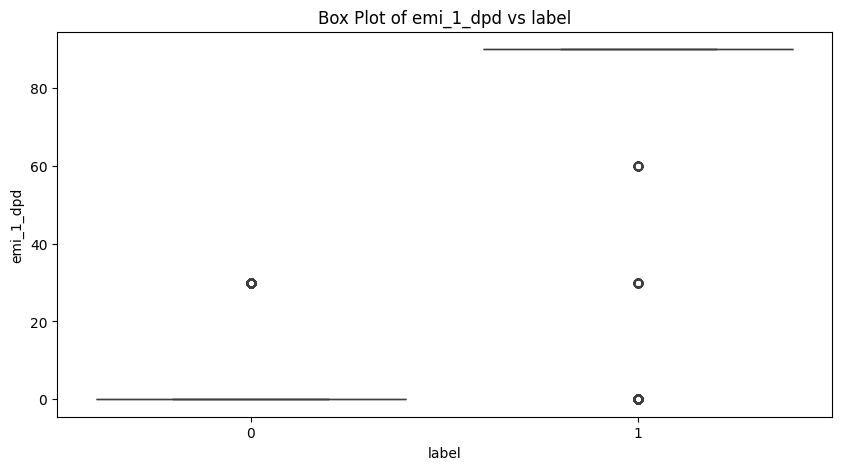

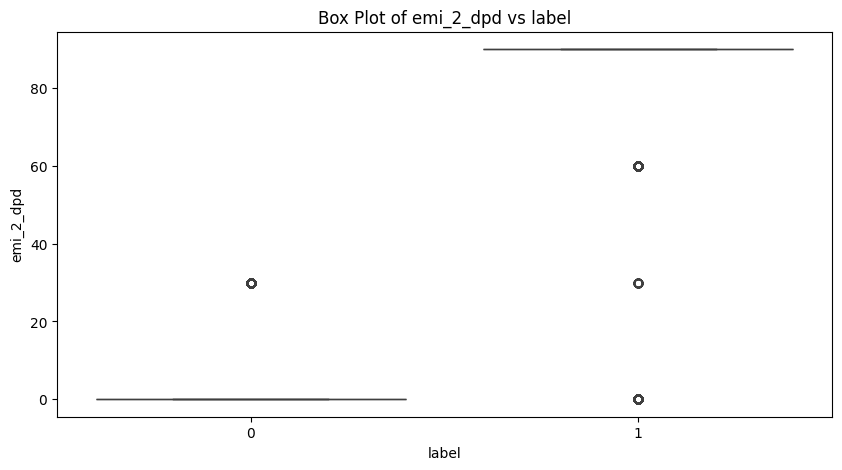

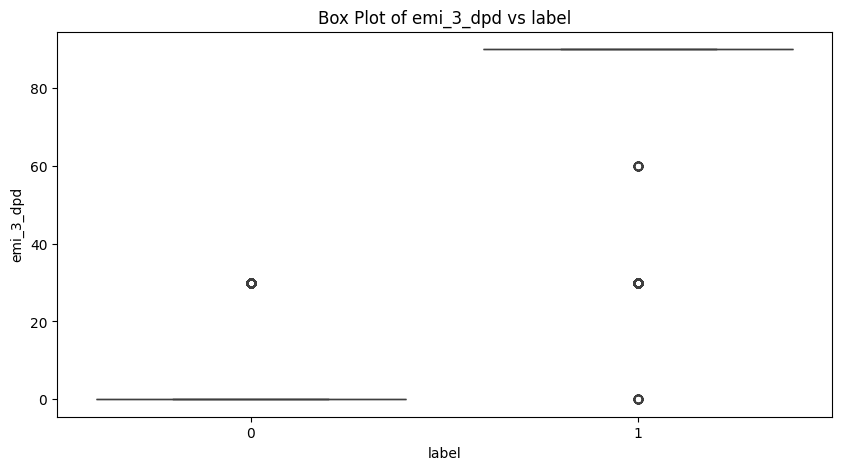

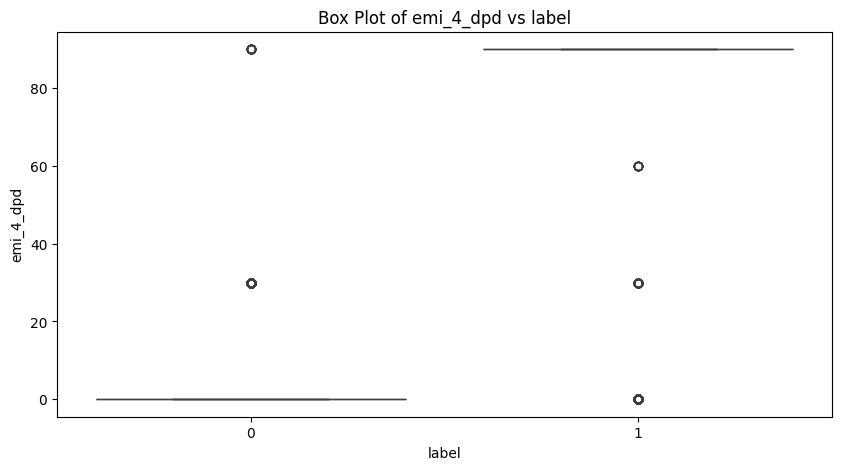

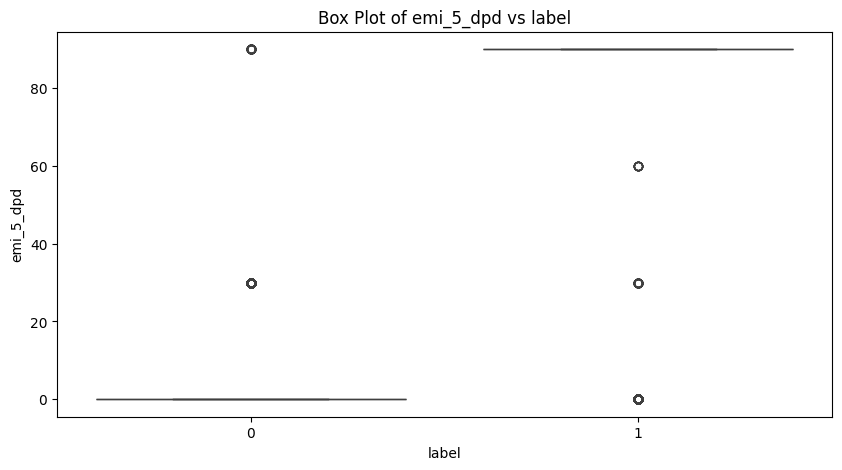

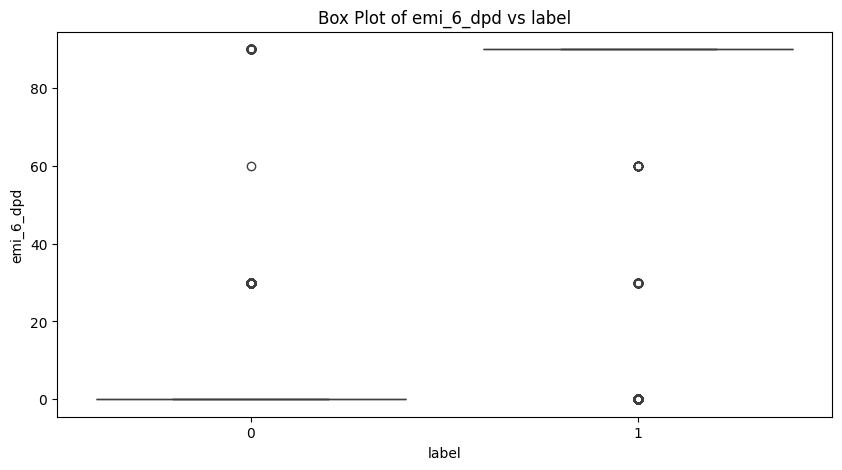

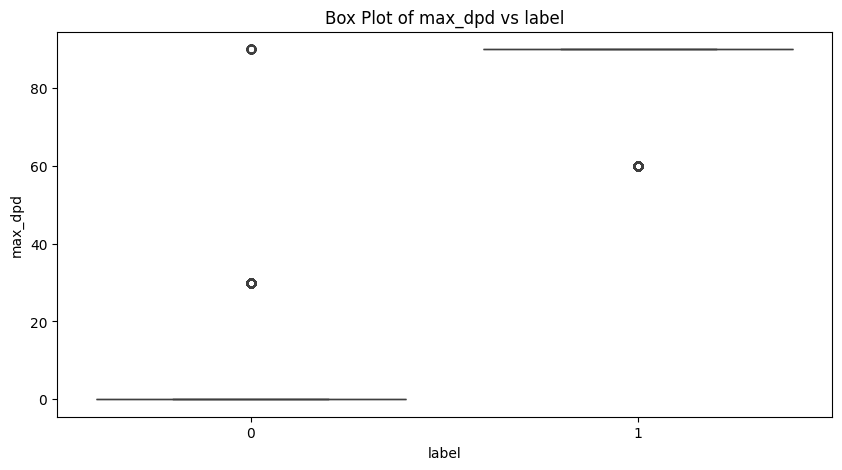

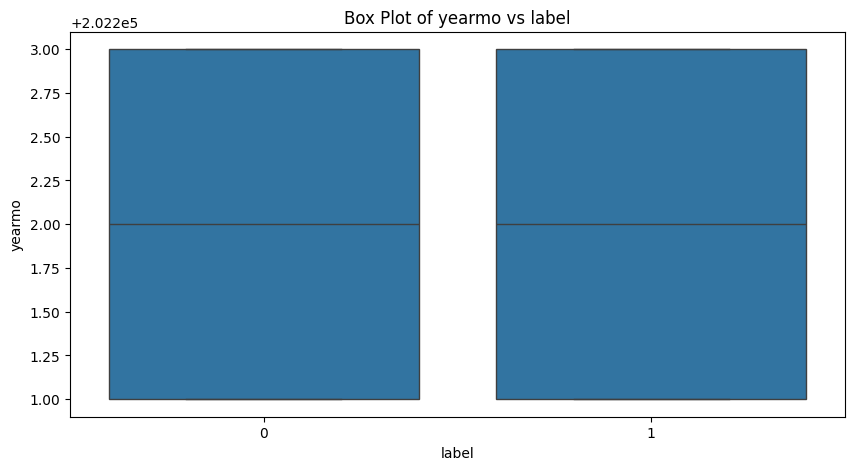

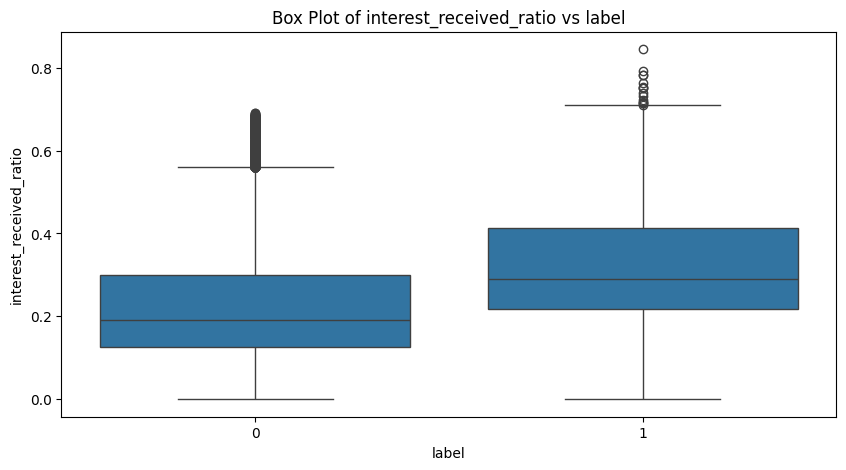

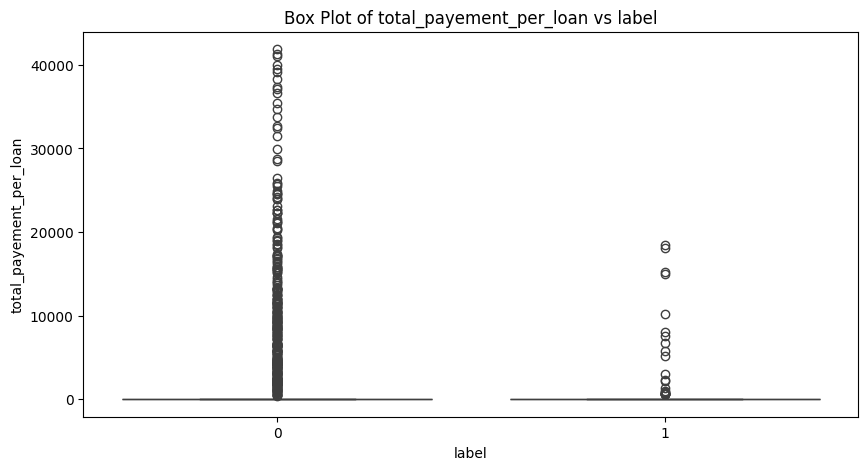

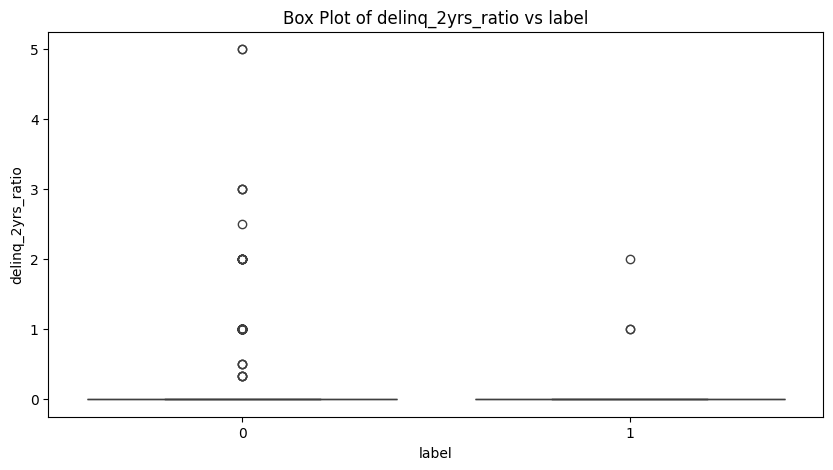

In [28]:
### Box Plot vs Label
def box_plot(df, feature, label):
    """Box Plot of feature vs label
    ----------
    df : DataFrame
    feature : String
    label : String
    
    Returns
    -------
    """
    plt.figure(figsize=(10, 5))
    plt.title(f"Box Plot of {feature} vs {label}")
    sns.boxplot(x = label, y = feature, data = df)
    plt.show()
for col in train.columns:
    if train[col].dtype in ['int64', 'float64']:
        box_plot(train, col, 'label')
        

Observation
- Distribution of Total Payment, Received Principal, Interest Received Ratio is different for Defaulters and Non-Defaulters
<br> 
<br>these can be some important features

In [29]:
## Train test split
X_train = train.drop(columns = id_cols+['label'])
y_train = train['label']

X_val = val.drop(columns = id_cols+['label'])
y_val = val['label']

X_hold_out = hold_out.drop(columns = id_cols+['label'])
y_hold_out = hold_out['label']

In [30]:
print(X_train.shape, X_val.shape, X_hold_out.shape)

(86250, 20) (28750, 20) (28727, 20)


<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:#87CEEB; /* Blue Sky */
           color:white;
           font-family:cursive
           ">
<h2 style="text-align:center;">Building Pipeline</h2>
</div>

In [31]:
numerical_features_train = X_train.select_dtypes(include = ['int64', 'float64']).columns
categorical_features_train = X_train.select_dtypes(include = ['object']).columns

numerical_features_val = X_val.select_dtypes(include = ['int64', 'float64']).columns
categorical_features_val = X_val.select_dtypes(include = ['object']).columns

numerical_features_hold_out = X_hold_out.select_dtypes(include = ['int64', 'float64']).columns
categorical_features_hold_out = X_hold_out.select_dtypes(include = ['object']).columns

In [32]:
# Numerical Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
num_pipeline = Pipeline(steps= [('impute_knn' , KNNImputer()) , ('Scaling' , RobustScaler())])
num_pipeline

Pipeline(steps=[('impute_knn', KNNImputer()), ('Scaling', RobustScaler())])

In [33]:
# Categorical Pipeline with Target Encoding
from sklearn.impute import SimpleImputer
cat_pipeline = Pipeline(steps= [('impute_cat' , SimpleImputer(strategy= 'constant', fill_value= 'Unknown')),
                                ('target_encoding' , ce.TargetEncoder())])
cat_pipeline

Pipeline(steps=[('impute_cat',
                 SimpleImputer(fill_value='Unknown', strategy='constant')),
                ('target_encoding', TargetEncoder())])

In [34]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers= [('num' , num_pipeline , numerical_features_train),
                                                ('cat' , cat_pipeline , categorical_features_train)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute_knn', KNNImputer()),
                                                 ('Scaling', RobustScaler())]),
                                 Index(['total_income', 'dependents', 'delinq_2yrs', 'total_payement',
       'received_principal', 'interest_received', 'number_of_loans',
       'interest_received_ratio', 'total_payement_per_loan',
       'delinq_2yrs_ratio'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute_cat',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('target_encoding',
                                                  TargetEncoder())]),
                                 Index(['employment_type', 'tier_of_employment', 'industry', 'role',
       'work_experience', 'married', 'home_type', 'pincode',
       'has_social_profile', 'is_verified'],
      dtype='object'))])

<div style="color:white;
           display:fill;
           border-radius:30px;
           font-size:100%;
           font-family:cursive;
           letter-spacing:2px;
           background-color:#87CEEB; /* Blue Sky */
           color:white;
           font-family:cursive
           ">
<h2 style="text-align:center;"> Model Development</h2>
</div>

In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [36]:
# SMOTE Pipeline
final_pipeline = Pipeline(steps= [('preprocessor' , preprocessor),
                                    ('smote' , SMOTE(random_state=42)),
                                    ('model' , LogisticRegression())])
final_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute_knn',
                                                                   KNNImputer()),
                                                                  ('Scaling',
                                                                   RobustScaler())]),
                                                  Index(['total_income', 'dependents', 'delinq_2yrs', 'total_payement',
       'received_principal', 'interest_received', 'number_of_loans',
       'interest_received_ratio', 'total_payement_per_loan',
       'delinq_2yrs_ratio'],
      dtype='o...
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('target_encoding',
                                                                   TargetEncoder())]),
                                                  Index(['employment_type', 'tier_of_employment', 'industry', 'role',
       'work_experience', 'married', 'home_type', 'pincode',
       'has_social_profile', 'is_verified'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression())])

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from imblearn.ensemble import RUSBoostClassifier
import lightgbm as lgb

In [38]:
from sklearn.model_selection import cross_validate
models = []
models.append(("Logistic Regression", LogisticRegression()))
models.append(("Knn", KNeighborsClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Ada boost", AdaBoostClassifier()))
models.append(("Xgb", XGBClassifier()))
models.append(("Naive Bayes", GaussianNB()))
models.append(("lightGBM", lightgbm.LGBMClassifier()))


for model in models:
    final_pipeline = Pipeline(steps=[('preprocessing', preprocessor), ('smote', SMOTE()), ('Model', model[1])])
    result = cross_validate(final_pipeline, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print(model[0])
    print(f"{model[0]} Train AUC: {result['train_score'].mean()} Test AUC: {result['test_score'].mean()}")
    print('Train F1 Score : ', result['train_score'].mean() * 100)
    print('Test F1 Score : ', result['test_score'].mean() * 100)

Logistic Regression
Logistic Regression Train AUC: 0.9050733633395998 Test AUC: 0.845883806855743
Train F1 Score :  90.50733633395997
Test F1 Score :  84.58838068557431
Knn
Knn Train AUC: 0.9981961905071277 Test AUC: 0.7601531556770875
Train F1 Score :  99.81961905071277
Test F1 Score :  76.01531556770875
Decision Tree
Decision Tree Train AUC: 1.0 Test AUC: 0.7876104742780834
Train F1 Score :  100.0
Test F1 Score :  78.76104742780834
Random Forest
Random Forest Train AUC: 1.0 Test AUC: 0.9235762353490904
Train F1 Score :  100.0
Test F1 Score :  92.35762353490904
Ada boost
Ada boost Train AUC: 0.9404683854466682 Test AUC: 0.885002725563752
Train F1 Score :  94.04683854466683
Test F1 Score :  88.50027255637521
Xgb
Xgb Train AUC: 0.9927991830184656 Test AUC: 0.9325599968451941
Train F1 Score :  99.27991830184656
Test F1 Score :  93.25599968451941
Naive Bayes
Naive Bayes Train AUC: 0.8497158732954186 Test AUC: 0.733660140026168
Train F1 Score :  84.97158732954186
Test F1 Score :  73.366014

In [39]:
final_pipeline = Pipeline(steps=[('preprocessing', preprocessor), ('smote', SMOTE()), ('Model', RUSBoostClassifier())])
result = cross_validate(final_pipeline, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
print('RUSBoost')
print(f"RUSBoost Train AUC: {result['train_score'].mean()} Test AUC: {result['test_score'].mean()}")
print('Train F1 Score : ', result['train_score'].mean() * 100)
print('Test F1 Score : ', result['test_score'].mean() * 100)

final_pipeline = Pipeline(steps=[('preprocessing', preprocessor), ('smote', SMOTE()), ('Model', GradientBoostingClassifier())])
result = cross_validate(final_pipeline, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
print('GradientBoosting')
print(f"GradientBoosting Train AUC: {result['train_score'].mean()} Test AUC: {result['test_score'].mean()}")
print('Train F1 Score : ', result['train_score'].mean() * 100)
print('Test F1 Score : ', result['test_score'].mean() * 100)

RUSBoost
RUSBoost Train AUC: 0.9404914753952596 Test AUC: 0.8801834096369241
Train F1 Score :  94.04914753952596
Test F1 Score :  88.01834096369241
GradientBoosting
GradientBoosting Train AUC: 0.9561857031150203 Test AUC: 0.9088942313607544
Train F1 Score :  95.61857031150203
Test F1 Score :  90.88942313607544


In [40]:
final_pipeline = Pipeline(steps=[('preprocessing', preprocessor), ('smote', SMOTE()), ('Model', CatBoostClassifier())])
result = cross_validate(final_pipeline, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
print('CatBoost')
print(f"CatBoost Train AUC: {result['train_score'].mean()} Test AUC: {result['test_score'].mean()}")
print('Train F1 Score : ', result['train_score'].mean() * 100)
print('Test F1 Score : ', result['test_score'].mean() * 100)


Learning rate set to 0.081001
0:	learn: 0.5989548	total: 232ms	remaining: 3m 52s
1:	learn: 0.5346674	total: 290ms	remaining: 2m 24s
2:	learn: 0.4623954	total: 335ms	remaining: 1m 51s
3:	learn: 0.4249216	total: 380ms	remaining: 1m 34s
4:	learn: 0.3859604	total: 429ms	remaining: 1m 25s
5:	learn: 0.3602055	total: 513ms	remaining: 1m 25s
6:	learn: 0.3421139	total: 556ms	remaining: 1m 18s
7:	learn: 0.3083821	total: 598ms	remaining: 1m 14s
8:	learn: 0.2821486	total: 642ms	remaining: 1m 10s
9:	learn: 0.2718094	total: 683ms	remaining: 1m 7s
10:	learn: 0.2542841	total: 725ms	remaining: 1m 5s
11:	learn: 0.2336619	total: 790ms	remaining: 1m 5s
12:	learn: 0.2211762	total: 836ms	remaining: 1m 3s
13:	learn: 0.2046239	total: 880ms	remaining: 1m 1s
14:	learn: 0.1915929	total: 920ms	remaining: 1m
15:	learn: 0.1771616	total: 976ms	remaining: 60s
16:	learn: 0.1687192	total: 1.03s	remaining: 59.4s
17:	learn: 0.1583989	total: 1.07s	remaining: 58.4s
18:	learn: 0.1521597	total: 1.11s	remaining: 57.6s
19:	lea

| Model              | Train AUC | Test AUC | Train F1 Score | Test F1 Score |
|--------------------|-----------|----------|----------------|---------------|
| Logistic Regression| 0.905     | 0.846    | 90.51          | 84.59         |
| KNN                | 0.998     | 0.760    | 99.82          | 76.02         |
| Decision Tree      | 1.0       | 0.788    | 100.0          | 78.76         |
| Random Forest      | 1.0       | 0.924    | 100.0          | 92.36         |
| AdaBoost           | 0.940     | 0.885    | 94.05          | 88.50         |
| XGBoost            | 0.993     | 0.933    | 99.28          | 93.26         |
| Naive Bayes        | 0.850     | 0.734    | 84.97          | 73.37         |
| LightGBM           | 0.981     | 0.922    | 98.06          | 92.20         |
| RUSBoost           | 0.940     | 0.880    | 94.05          | 88.02         |
| Gradient Boosting  | 0.956     | 0.909    | 95.62          | 90.89         |
| CatBoost           | 0.993     | 0.942    | 99.29          | 94.24         |


__From__ the table, it seems that the __CatBoost model__ has the __highest test AUC (0.942)__ and test F1 score (94.24), indicating better performance on unseen data compared to other models. Therefore, CatBoost appears to be the best model among those listed.

In [44]:
# Hyperparameter Tuning for CatBoost
from imblearn.pipeline import Pipeline as ImbPipeline  # Import the imblearn Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# Create a pipeline
final_pipeline = ImbPipeline(steps=[('preprocessing', preprocessor), ('smote', SMOTE()), ('Model', CatBoostClassifier())])
param = { 'Model__learning_rate': [0.01, 0.05, 0.1, 0.3],
            'Model__depth': [3, 5, 7, 9],
            'Model__l2_leaf_reg': [1, 3, 5, 7, 9],
            'Model__iterations': [100, 500, 1000, 2000]
            }
# Create a grid search object
grid = RandomizedSearchCV(final_pipeline, param, cv=5, scoring='roc_auc', n_iter=10, n_jobs=-1, verbose=10)
grid.fit(X_train, y_train)
print(grid.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6137388	total: 106ms	remaining: 3m 32s
1:	learn: 0.5468058	total: 223ms	remaining: 3m 42s
2:	learn: 0.4974798	total: 348ms	remaining: 3m 51s
3:	learn: 0.4587386	total: 477ms	remaining: 3m 57s
4:	learn: 0.4168786	total: 606ms	remaining: 4m 1s
5:	learn: 0.3813682	total: 728ms	remaining: 4m 1s
6:	learn: 0.3558816	total: 858ms	remaining: 4m 4s
7:	learn: 0.3357679	total: 978ms	remaining: 4m 3s
8:	learn: 0.3128427	total: 1.1s	remaining: 4m 4s
9:	learn: 0.2850713	total: 1.23s	remaining: 4m 4s
10:	learn: 0.2723647	total: 1.36s	remaining: 4m 5s
11:	learn: 0.2562587	total: 1.48s	remaining: 4m 4s
12:	learn: 0.2418017	total: 1.61s	remaining: 4m 6s
13:	learn: 0.2308890	total: 1.73s	remaining: 4m 5s
14:	learn: 0.2205566	total: 1.83s	remaining: 4m 2s
15:	learn: 0.2106997	total: 1.94s	remaining: 4m 1s
16:	learn: 0.2038383	total: 2.05s	remaining: 3m 58s
17:	learn: 0.1949124	total: 2.16s	remaining: 3m 58s
18:	learn: 0.1862557	total

In [46]:
best_params = {'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 2000, 'depth': 9}
final_pipeline = ImbPipeline(steps=[('preprocessing', preprocessor), ('smote', SMOTE()), ('Model', CatBoostClassifier(**best_params))])
result = cross_validate(final_pipeline, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
print('CatBoost')
print(f"CatBoost Train AUC: {result['train_score'].mean()} Test AUC: {result['test_score'].mean()}")
print('Train F1 Score : ', result['train_score'].mean() * 100)
print('Test F1 Score : ', result['test_score'].mean() * 100)

0:	learn: 0.6161613	total: 106ms	remaining: 3m 31s
1:	learn: 0.5492643	total: 198ms	remaining: 3m 17s
2:	learn: 0.4955148	total: 281ms	remaining: 3m 7s
3:	learn: 0.4492479	total: 384ms	remaining: 3m 11s
4:	learn: 0.4126578	total: 478ms	remaining: 3m 10s
5:	learn: 0.3781906	total: 568ms	remaining: 3m 8s
6:	learn: 0.3550367	total: 662ms	remaining: 3m 8s
7:	learn: 0.3300977	total: 744ms	remaining: 3m 5s
8:	learn: 0.3138093	total: 831ms	remaining: 3m 3s
9:	learn: 0.2962745	total: 929ms	remaining: 3m 4s
10:	learn: 0.2790840	total: 1.02s	remaining: 3m 4s
11:	learn: 0.2626824	total: 1.11s	remaining: 3m 3s
12:	learn: 0.2455013	total: 1.21s	remaining: 3m 4s
13:	learn: 0.2369366	total: 1.3s	remaining: 3m 4s
14:	learn: 0.2256598	total: 1.39s	remaining: 3m 3s
15:	learn: 0.2177395	total: 1.49s	remaining: 3m 4s
16:	learn: 0.2105899	total: 1.58s	remaining: 3m 3s
17:	learn: 0.2036604	total: 1.66s	remaining: 3m 3s
18:	learn: 0.1952246	total: 1.77s	remaining: 3m 4s
19:	learn: 0.1874097	total: 1.86s	rema

In [48]:
## Test set metrics
from sklearn.metrics import roc_auc_score, precision_score, average_precision_score, classification_report
final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_val)
y_prob = final_pipeline.predict_proba(X_val)[:,1]
print("Validation AUC : ", roc_auc_score(y_val, y_prob))
print("Validation Precision : ", precision_score(y_val, y_pred))
print("Validation Average Precision : ", average_precision_score(y_val, y_prob))
print("Classification Report : ", classification_report(y_val, y_pred))

0:	learn: 0.6133173	total: 127ms	remaining: 4m 13s
1:	learn: 0.5469039	total: 238ms	remaining: 3m 57s
2:	learn: 0.4875927	total: 382ms	remaining: 4m 14s
3:	learn: 0.4485018	total: 502ms	remaining: 4m 10s
4:	learn: 0.4084427	total: 611ms	remaining: 4m 3s
5:	learn: 0.3809286	total: 741ms	remaining: 4m 6s
6:	learn: 0.3552933	total: 852ms	remaining: 4m 2s
7:	learn: 0.3363088	total: 960ms	remaining: 3m 59s
8:	learn: 0.3126087	total: 1.06s	remaining: 3m 55s
9:	learn: 0.2915983	total: 1.17s	remaining: 3m 53s
10:	learn: 0.2784142	total: 1.27s	remaining: 3m 50s
11:	learn: 0.2625769	total: 1.39s	remaining: 3m 49s
12:	learn: 0.2473629	total: 1.49s	remaining: 3m 47s
13:	learn: 0.2359525	total: 1.6s	remaining: 3m 46s
14:	learn: 0.2240342	total: 1.72s	remaining: 3m 47s
15:	learn: 0.2132266	total: 1.83s	remaining: 3m 46s
16:	learn: 0.2063742	total: 1.93s	remaining: 3m 44s
17:	learn: 0.1964921	total: 2.04s	remaining: 3m 44s
18:	learn: 0.1891319	total: 2.15s	remaining: 3m 43s
19:	learn: 0.1816279	total

In [50]:
## Hold Out set metrics
final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_hold_out)
y_prob = final_pipeline.predict_proba(X_hold_out)[:,1]
print("Hold Out AUC : ", roc_auc_score(y_hold_out, y_prob))
print("Hold Out Precision : ", precision_score(y_hold_out, y_pred))
print("Hold Out Average Precision : ", average_precision_score(y_hold_out, y_prob))
print("Classification Report : ", classification_report(y_hold_out, y_pred))

0:	learn: 0.6137531	total: 165ms	remaining: 5m 29s
1:	learn: 0.5469967	total: 271ms	remaining: 4m 30s
2:	learn: 0.4873361	total: 377ms	remaining: 4m 11s
3:	learn: 0.4470702	total: 521ms	remaining: 4m 20s
4:	learn: 0.4079546	total: 641ms	remaining: 4m 15s
5:	learn: 0.3725751	total: 748ms	remaining: 4m 8s
6:	learn: 0.3484294	total: 861ms	remaining: 4m 5s
7:	learn: 0.3275800	total: 972ms	remaining: 4m 1s
8:	learn: 0.3101899	total: 1.08s	remaining: 3m 58s
9:	learn: 0.2840462	total: 1.2s	remaining: 3m 59s
10:	learn: 0.2661979	total: 1.31s	remaining: 3m 56s
11:	learn: 0.2510439	total: 1.42s	remaining: 3m 54s
12:	learn: 0.2407515	total: 1.53s	remaining: 3m 53s
13:	learn: 0.2319901	total: 1.67s	remaining: 3m 56s
14:	learn: 0.2216139	total: 1.79s	remaining: 3m 56s
15:	learn: 0.2105375	total: 1.9s	remaining: 3m 55s
16:	learn: 0.2038590	total: 2.01s	remaining: 3m 54s
17:	learn: 0.1967041	total: 2.12s	remaining: 3m 53s
18:	learn: 0.1881772	total: 2.25s	remaining: 3m 54s
19:	learn: 0.1792554	total:

In [59]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, classification_report, recall_score


# Calculate precision, recall, and thresholds using sklearn
precision, recall, thresholds = precision_recall_curve(y_hold_out, y_prob)

# Calculate F1 scores for each possible threshold
f1_scores = 2 * recall * precision / (recall + precision)

# Find the threshold that maximizes F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

# Use this threshold to adjust your classification decisions
y_pred_adjusted = (y_prob >= optimal_threshold).astype(int)

# Evaluate performance after threshold adjustment
print("Adjusted Classification Report:")
print(classification_report(y_hold_out, y_pred_adjusted))

# Optionally, compare it with the original performance
print("Original Hold Out Precision:", precision_score(y_hold_out, y_pred))
print("Original Hold Out Recall:", recall_score(y_hold_out, y_pred))
print("Adjusted Hold Out Precision:", precision_score(y_hold_out, y_pred_adjusted))
print("Adjusted Hold Out Recall:", recall_score(y_hold_out, y_pred_adjusted))


Optimal Threshold: 0.3347658229913287
Adjusted Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     26118
           1       0.85      0.74      0.79      2609

    accuracy                           0.97     28727
   macro avg       0.91      0.86      0.89     28727
weighted avg       0.96      0.97      0.96     28727

Original Hold Out Precision: 0.9068948163059889
Original Hold Out Recall: 0.6906860866232273
Adjusted Hold Out Precision: 0.8546177640300486
Adjusted Hold Out Recall: 0.7412801839785358


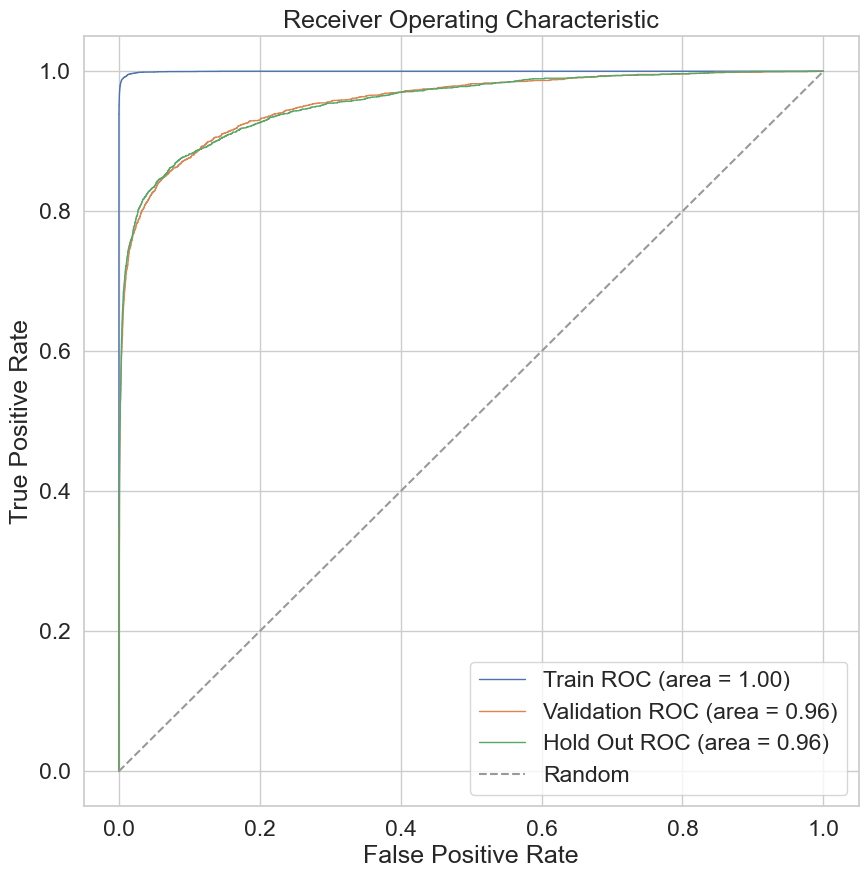

In [61]:
# ROC Curve for train, validation and hold out
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.5)
plt.figure(figsize=(10, 10))
fpr, tpr, thresholds = roc_curve(y_train, final_pipeline.predict_proba(X_train)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Train ROC (area = %0.2f)' % (roc_auc))
fpr, tpr, thresholds = roc_curve(y_val, final_pipeline.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Validation ROC (area = %0.2f)' % (roc_auc))
fpr, tpr, thresholds = roc_curve(y_hold_out, final_pipeline.predict_proba(X_hold_out)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Hold Out ROC (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

PR Curve for Class 1


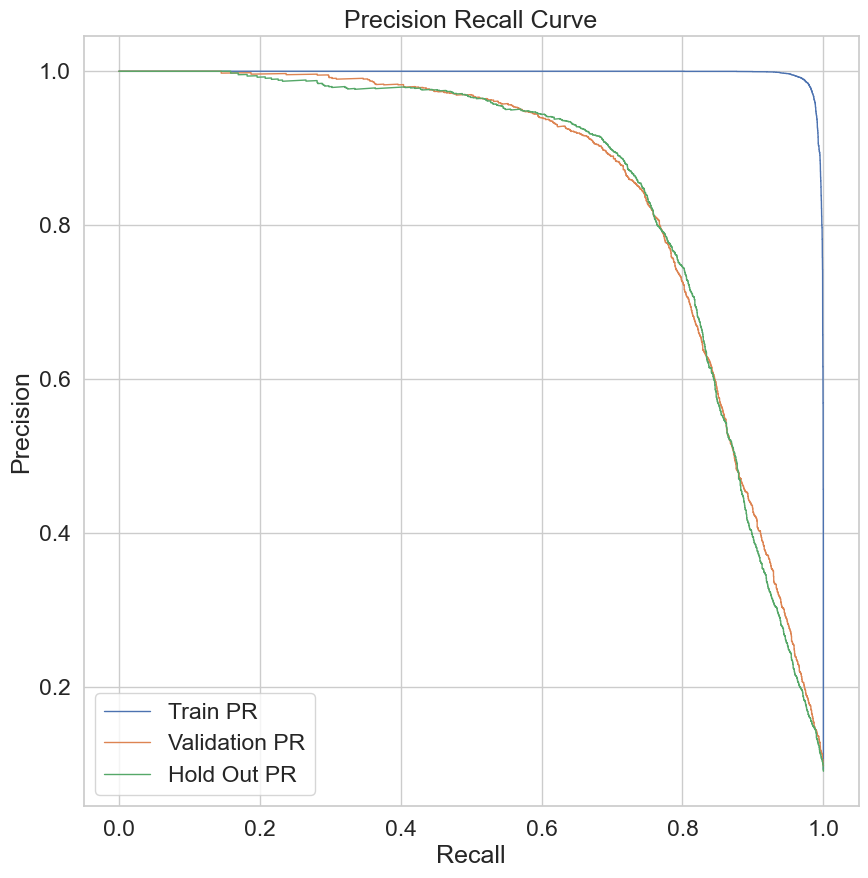

In [63]:
print("PR Curve for Class 1")  #  for train, validation and hold out
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.5)
plt.figure(figsize=(10, 10))
precision, recall, thresholds = precision_recall_curve(y_train, final_pipeline.predict_proba(X_train)[:,1])
plt.plot(recall, precision, lw=1, label='Train PR')
precision, recall, thresholds = precision_recall_curve(y_val, final_pipeline.predict_proba(X_val)[:,1])
plt.plot(recall, precision, lw=1, label='Validation PR')
precision, recall, thresholds = precision_recall_curve(y_hold_out, final_pipeline.predict_proba(X_hold_out)[:,1])
plt.plot(recall, precision, lw=1, label='Hold Out PR')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower left")
plt.show()



PR Curve for Class 0


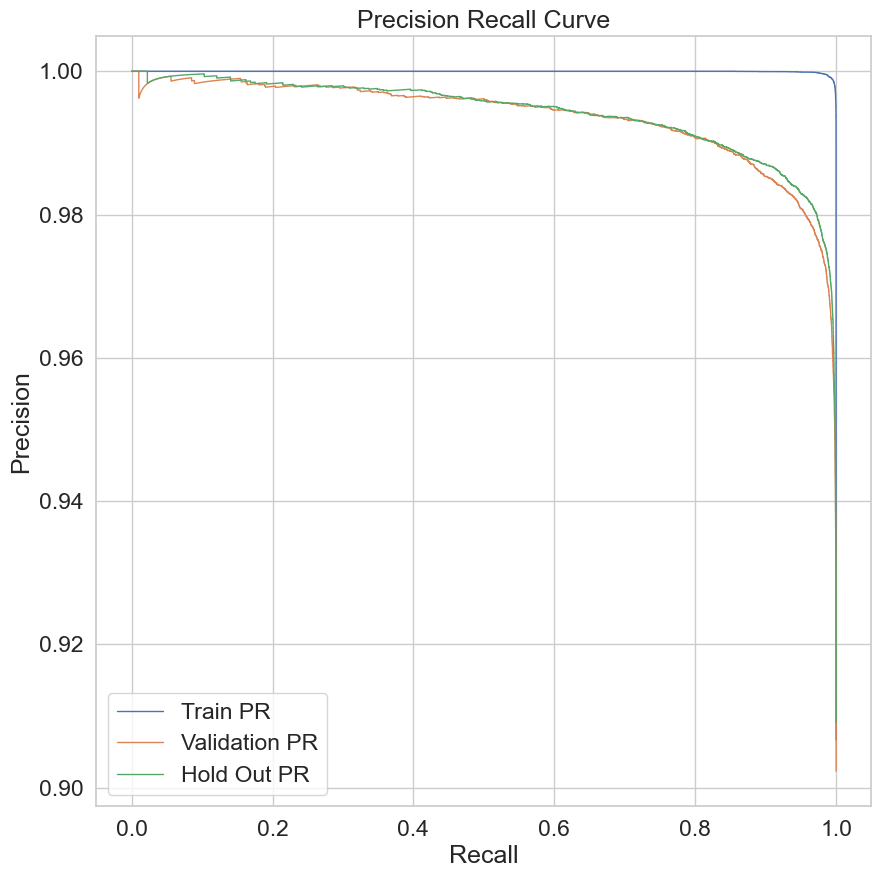

In [66]:
print("PR Curve for Class 0")  #  for train, validation and hold out
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.5)
plt.figure(figsize=(10, 10))
precision, recall, thresholds = precision_recall_curve(1-y_train, final_pipeline.predict_proba(X_train)[:,0])
plt.plot(recall, precision, lw=1, label='Train PR')
precision, recall, thresholds = precision_recall_curve(1-y_val, final_pipeline.predict_proba(X_val)[:,0])
plt.plot(recall, precision, lw=1, label='Validation PR')
precision, recall, thresholds = precision_recall_curve(1-y_hold_out, final_pipeline.predict_proba(X_hold_out)[:,0])
plt.plot(recall, precision, lw=1, label='Hold Out PR')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower left")
plt.show()


# Feature Selection
<br> There can be many methods to do feature selection like Mrmr, KS, Information Gain etc., Random Forest and Deep Decision Tree can also be used as Feature Selection</br>
<br> 
**Random Forest** - Since Random Forest subset features too, so every feature gets chance to split tree
<br> 
**Decision Tree** - Decision Tree Uses Greedy Algorithm to split Tree so choose between 2 correlated features which one is best
<br>
<br>Drop features which are of 0 importance in Random Forest and Decision Tree

In [76]:
random_forest_zero_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': final_pipeline.named_steps['Model'].feature_importances_}).sort_values('Importance', ascending=False)
random_forest_zero_importance.head(20)

Feature  Importance
19        delinq_2yrs_ratio      13.099
15        interest_received      12.876
18  total_payement_per_loan      12.735
4           work_experience      10.225
10       has_social_profile       9.094
12              delinq_2yrs       7.842
16          number_of_loans       7.460
7                dependents       6.394
3                      role       5.009
14       received_principal       3.997
0           employment_type       2.281
11              is_verified       2.136
17  interest_received_ratio       2.025
5              total_income       1.951
13           total_payement       1.539
1        tier_of_employment       0.962
2                  industry       0.367
6                   married       0.005
8                 home_type       0.004
9                   pincode       0.000

In [77]:
decision_tree_zero_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': final_pipeline.named_steps['Model'].feature_importances_}).sort_values('Importance', ascending=False)
decision_tree_zero_importance.head(20)

Feature  Importance
19        delinq_2yrs_ratio      13.099
15        interest_received      12.876
18  total_payement_per_loan      12.735
4           work_experience      10.225
10       has_social_profile       9.094
12              delinq_2yrs       7.842
16          number_of_loans       7.460
7                dependents       6.394
3                      role       5.009
14       received_principal       3.997
0           employment_type       2.281
11              is_verified       2.136
17  interest_received_ratio       2.025
5              total_income       1.951
13           total_payement       1.539
1        tier_of_employment       0.962
2                  industry       0.367
6                   married       0.005
8                 home_type       0.004
9                   pincode       0.000

In [80]:
categorical_features_hold_out

Index(['employment_type', 'tier_of_employment', 'industry', 'role',
       'work_experience', 'married', 'home_type', 'pincode',
       'has_social_profile', 'is_verified'],
      dtype='object')

In [81]:
categorical_features_train = ['employment_type', 'tier_of_employment', 'industry', 'role',
       'work_experience', 'married', 'home_type',
       'has_social_profile', 'is_verified']

In [82]:
# Drop pincode column and retrain the model
X_train = X_train.drop(columns = ['pincode'])
X_val = X_val.drop(columns = ['pincode'])
X_hold_out = X_hold_out.drop(columns = ['pincode'])

KeyError: "['pincode'] not found in axis"

In [83]:
preprocessor = ColumnTransformer(transformers= [('num' , num_pipeline , numerical_features_train),
                                                ('cat' , cat_pipeline , categorical_features_train)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute_knn', KNNImputer()),
                                                 ('Scaling', RobustScaler())]),
                                 Index(['total_income', 'dependents', 'delinq_2yrs', 'total_payement',
       'received_principal', 'interest_received', 'number_of_loans',
       'interest_received_ratio', 'total_payement_per_loan',
       'delinq_2yrs_ratio'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute_cat',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('target_encoding',
                                                  TargetEncoder())]),
                                 ['employment_type', 'tier_of_employment',
                                  'industry', 'role', 'work_experience',
                                  'married', 'home_type', 'has_social_profile',
                                  'is_verified'])])

In [84]:
final_pipeline = Pipeline(steps=[('preprocessing', preprocessor), ('smote', SMOTE()), ('Model', CatBoostClassifier(**best_params))])
result = cross_validate(final_pipeline, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
print('CatBoost')
# Classification Report
final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_hold_out)
y_prob = final_pipeline.predict_proba(X_hold_out)[:,1]
print("Hold Out AUC : ", roc_auc_score(y_hold_out, y_prob))
print("Hold Out Precision : ", precision_score(y_hold_out, y_pred))
print("Hold Out Average Precision : ", average_precision_score(y_hold_out, y_prob))
print("Classification Report : ", classification_report(y_hold_out, y_pred))

0:	learn: 0.6152451	total: 134ms	remaining: 4m 28s
1:	learn: 0.5506227	total: 225ms	remaining: 3m 45s
2:	learn: 0.4995543	total: 311ms	remaining: 3m 26s
3:	learn: 0.4537817	total: 446ms	remaining: 3m 42s
4:	learn: 0.4099510	total: 534ms	remaining: 3m 33s
5:	learn: 0.3768092	total: 623ms	remaining: 3m 26s
6:	learn: 0.3539969	total: 744ms	remaining: 3m 31s
7:	learn: 0.3299983	total: 839ms	remaining: 3m 29s
8:	learn: 0.3085348	total: 927ms	remaining: 3m 25s
9:	learn: 0.2897512	total: 1.04s	remaining: 3m 26s
10:	learn: 0.2735773	total: 1.12s	remaining: 3m 23s
11:	learn: 0.2584130	total: 1.23s	remaining: 3m 23s
12:	learn: 0.2451714	total: 1.34s	remaining: 3m 25s
13:	learn: 0.2330084	total: 1.43s	remaining: 3m 22s
14:	learn: 0.2231362	total: 1.51s	remaining: 3m 20s
15:	learn: 0.2137305	total: 1.62s	remaining: 3m 21s
16:	learn: 0.2046048	total: 1.72s	remaining: 3m 20s
17:	learn: 0.1997660	total: 1.8s	remaining: 3m 18s
18:	learn: 0.1916245	total: 1.91s	remaining: 3m 19s
19:	learn: 0.1853609	to

In [86]:
# Create the final pipeline with LightGBM model
lgbm_model = LGBMClassifier(objective='binary')

final_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE()),
    ('Model', lgbm_model)
])

# Cross-validate the pipeline
result = cross_validate(final_pipeline, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
print('LightGBM Cross-validation Results')
print(result)

# Fit the model and make predictions on the hold-out set
final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_hold_out)
y_prob = final_pipeline.predict_proba(X_hold_out)[:, 1]

# Evaluation
print("Hold Out AUC : ", roc_auc_score(y_hold_out, y_prob))
print("Hold Out Precision : ", precision_score(y_hold_out, y_pred))
print("Hold Out Average Precision : ", average_precision_score(y_hold_out, y_prob))
print("Classification Report : ", classification_report(y_hold_out, y_pred))

[LightGBM] [Info] Number of positive: 62560, number of negative: 62560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4273
[LightGBM] [Info] Number of data points in the train set: 125120, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 62559, number of negative: 62559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4252
[LightGBM] [Info] Number of data points in the train set: 125118, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 62559, number of n

In [88]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score

# Define the search space
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'num_leaves': hp.choice('num_leaves', range(20, 150, 5)),
    'max_depth': hp.choice('max_depth', range(5, 30, 1)),
    'min_child_weight': hp.uniform('min_child_weight', 0.001, 0.05),
    # Add more parameters here as needed
}

# Objective function to minimize
def objective(params):
    params = {'learning_rate': params['learning_rate'],
              'num_leaves': params['num_leaves'],
              'max_depth': params['max_depth'],
              'min_child_weight': params['min_child_weight'],
              'objective': 'binary'}
    lgbm_model = LGBMClassifier(**params)
    pipeline = Pipeline(steps=[('preprocessing', preprocessor),
                               ('smote', SMOTE()),
                               ('model', lgbm_model)])
    
    score = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=5).mean()
    return {'loss': -score, 'status': STATUS_OK}

# Run the hyperparameter search using Hyperopt
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print("Best hyperparameters:", best)


[LightGBM] [Info] Number of positive: 62560, number of negative: 62560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.104996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4278                      
[LightGBM] [Info] Number of data points in the train set: 125120, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 62559, number of negative: 62559
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4249                      
[LightGBM] [Info] Number of data points in the train set: 125118, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 62559, number of negative: 62559
[Ligh

In [89]:
# Best hyperparameters: {'learning_rate': 0.1299436768887628, 'max_depth': 6, 'min_child_weight': 0.009322898432259169, 'num_leaves': 17}
best_params = {'learning_rate': 0.1299436768887628, 'max_depth': 6, 'min_child_weight': 0.009322898432259169, 'num_leaves': 17}
lgb = LGBMClassifier(**best_params)
final_pipeline = Pipeline(steps=[('preprocessing', preprocessor), ('smote', SMOTE()), ('Model', lgb)])
result = cross_validate(final_pipeline, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
print('LightGBM')
print(f"LightGBM Train AUC: {result['train_score'].mean()} Test AUC: {result['test_score'].mean()}")
print('Train F1 Score : ', result['train_score'].mean() * 100)
print('Test F1 Score : ', result['test_score'].mean() * 100)

[LightGBM] [Info] Number of positive: 62560, number of negative: 62560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4264
[LightGBM] [Info] Number of data points in the train set: 125120, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 62559, number of negative: 62559
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4264
[LightGBM] [Info] Number of data points in the train set: 125118, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 62559, number of negative: 62559
[LightGBM] [Info] Auto-choosing col-wise multi-th

In [90]:
# Fit the model and make predictions on the hold-out set
final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_hold_out)
y_prob = final_pipeline.predict_proba(X_hold_out)[:, 1]
 
# Evaluation
print("Hold Out AUC : ", roc_auc_score(y_hold_out, y_prob))
print("Hold Out Precision : ", precision_score(y_hold_out, y_pred))
print("Hold Out Average Precision : ", average_precision_score(y_hold_out, y_prob))
print("Classification Report : ", classification_report(y_hold_out, y_pred))


[LightGBM] [Info] Number of positive: 78199, number of negative: 78199
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4315
[LightGBM] [Info] Number of data points in the train set: 156398, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Hold Out AUC :  0.928447273718467
Hold Out Precision :  0.8344370860927153
Hold Out Average Precision :  0.7507930561669155
Classification Report :                precision    recall  f1-score   support

           0       0.96      0.99      0.98     26118
           1       0.83      0.63      0.72      2609

    accuracy                           0.95     28727
   macro avg       0.90      0.81      0.85     28727
weighted avg       0.95      0.95      0.95     28727



# Catboost model is the best model for this data

In [95]:
best_params = {'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 2000, 'depth': 9}
final_pipeline = Pipeline(steps=[('preprocessing', preprocessor), ('smote', SMOTE()), ('Model', CatBoostClassifier(**best_params))])
final_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute_knn',
                                                                   KNNImputer()),
                                                                  ('Scaling',
                                                                   RobustScaler())]),
                                                  Index(['total_income', 'dependents', 'delinq_2yrs', 'total_payement',
       'received_principal', 'interest_received', 'number_of_loans',
       'interest_received_ratio', 'total_payement_per_loan',
       'delinq_2yrs_ratio'],
      dtype='...
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('target_encoding',
                                                                   TargetEncoder())]),
                                                  ['employment_type',
                                                   'tier_of_employment',
                                                   'industry', 'role',
                                                   'work_experience', 'married',
                                                   'home_type',
                                                   'has_social_profile',
                                                   'is_verified'])])),
                ('smote', SMOTE()),
                ('Model',
                 <catboost.core.CatBoostClassifier object at 0x0000022C4F4FEBA0>)])

In [106]:
import numpy as np

# Dummy y variable (can be all zeros since it's not actually used)
dummy_y = np.zeros(len(X_train))

# Step 2: Apply preprocessing to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train, dummy_y)

# Step 3: Apply SMOTE to the preprocessed training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_preprocessed, y_train)


0:	learn: 0.6688488	total: 82.3ms	remaining: 2m 44s
1:	learn: 0.6447853	total: 156ms	remaining: 2m 35s
2:	learn: 0.6257248	total: 234ms	remaining: 2m 35s
3:	learn: 0.6097181	total: 330ms	remaining: 2m 44s
4:	learn: 0.5946465	total: 412ms	remaining: 2m 44s
5:	learn: 0.5805153	total: 494ms	remaining: 2m 44s
6:	learn: 0.5668834	total: 580ms	remaining: 2m 45s
7:	learn: 0.5556752	total: 657ms	remaining: 2m 43s
8:	learn: 0.5454591	total: 734ms	remaining: 2m 42s
9:	learn: 0.5368875	total: 815ms	remaining: 2m 42s
10:	learn: 0.5280575	total: 906ms	remaining: 2m 43s
11:	learn: 0.5200929	total: 991ms	remaining: 2m 44s
12:	learn: 0.5121228	total: 1.09s	remaining: 2m 46s
13:	learn: 0.5057911	total: 1.17s	remaining: 2m 46s
14:	learn: 0.5003366	total: 1.24s	remaining: 2m 44s
15:	learn: 0.4945186	total: 1.33s	remaining: 2m 45s
16:	learn: 0.4896887	total: 1.42s	remaining: 2m 45s
17:	learn: 0.4843124	total: 1.49s	remaining: 2m 44s
18:	learn: 0.4796755	total: 1.57s	remaining: 2m 44s
19:	learn: 0.4759206	

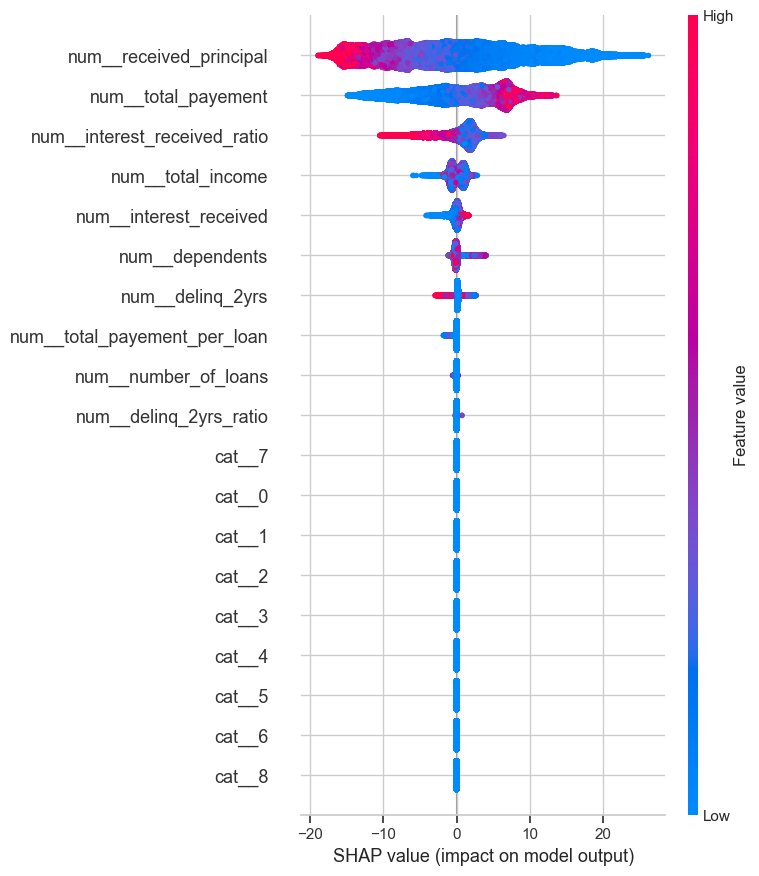

In [108]:
# Step 4: Train the model
import shap
final_model = CatBoostClassifier(**best_params)
final_model.fit(X_train_resampled, y_train_resampled)

# Step 5: Explain model predictions using SHAP
explainer = shap.Explainer(final_model)
shap_values = explainer(X_train_resampled)
shap.summary_plot(shap_values, X_train_resampled, feature_names=preprocessor.get_feature_names_out())

# Credit Risk Prediction Model Summary

## Model Overview
We developed a machine learning model using CatBoost, aiming to predict credit risk with high accuracy. Credit risk assessment is crucial for determining the creditworthiness of potential borrowers to minimize defaults and financial losses. Our model employs an ensemble approach, enhanced with SMOTE for handling imbalanced classes, and rigorous cross-validation to ensure robustness and generalizability.

## Training and Validation Results
The model was trained and validated on a dataset with a significant imbalance towards non-risky borrowers, reflective of real-world credit distribution. Here are the key performance metrics:

- **Cross-Validation on Training Data**
  - Train AUC: 99.98%
  - Test AUC: 93.81%

- **Validation Set Performance**
  - AUC: 95.74%
  - Precision: 89.94%
  - Average Precision: 85.56%
  - F1-Score for Non-risky Borrowers: 98%
  - F1-Score for Risky Borrowers: 78%

## Hold-Out Set Performance
To further test the model's generalization capability, we evaluated it on a hold-out dataset, yielding the following results:

- AUC: 95.77%
- Precision: 90.81%
- Average Precision: 85.35%
- F1-Score for Non-risky Borrowers: 98%
- F1-Score for Risky Borrowers: 79%

## Label Distribution
The model was trained and evaluated on datasets with the following label distributions, indicating the proportion of non-risky (0) versus risky (1) borrowers:

- **Training Set**: 90.666% non-risky, 9.334% risky
- **Validation Set**: 90.230% non-risky, 9.770% risky
- **Hold-Out Set**: 90.918% non-risky, 9.082% risky

## Business Implications
This model demonstrates excellent potential for accurately identifying creditworthy applicants, significantly reducing the risk of defaults. The high AUC and precision metrics, particularly for identifying risky borrowers, ensure that the model can be a reliable tool in the credit risk assessment process. Implementing this model can lead to more informed lending decisions, optimizing the balance between risk management and customer acquisition.

### Recommendations for Future Improvements
- Further tuning of hyperparameters could enhance model performance.
- Exploring additional features that might improve the predictive accuracy.
- Continuous model monitoring and updating with new data to maintain its performance over time.


# Done by: *Ibrahim Abdelnasar Yakout*